In [1]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [3]:
#2.2 | Stats Function
def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

In [11]:
# Reading dataset files

In [42]:
x1 = pd.read_excel("new Training Data ERROR.xlsx")

In [43]:
x1.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1.000,1303834.000,23.000,3.000,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.000,13.000,0.000
1,2.000,7574516.000,40.000,10.000,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.000,13.000,0.000
2,3.000,3991815.000,66.000,4.000,married,rented,no,Technical_writer,Alappuzha,Kerala,4.000,10.000,0.000
3,4.000,6256451.000,41.000,2.000,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.000,12.000,1.000
4,5.000,5768871.000,47.000,11.000,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.000,14.000,1.000
5,6.000,6915937.000,64.000,0.000,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0.000,12.000,0.000
6,7.000,3954973.000,58.000,14.000,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8.000,12.000,0.000
7,8.000,1706172.000,33.000,2.000,single,rented,no,Economist,Jamnagar,Gujarat,2.000,14.000,0.000
8,9.000,7566849.000,24.000,17.000,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11.000,11.000,0.000
9,10.000,8964846.000,23.000,12.000,single,rented,no,Architect,Karimnagar,Telangana,5.000,13.000,0.000


In [44]:
x1.shape

(252004, 13)

In [45]:
x1.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [46]:
x1.size

3276052

In [53]:
x1.describe(include="all")

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252001.000,252000.000,252000.000,251997.000,251995,251996,252000,251998,251997,251998,252000.000,251994.000,251998.000
unique,NaN,NaN,NaN,NaN,2,3,3,51,318,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226267,231893,176000,5957,1259,28400,NaN,NaN,NaN
mean,126001.000,4997117.584,49.954,10.085,NaN,NaN,NaN,NaN,NaN,NaN,6.334,11.998,0.123
std,72746.567,2878311.458,17.064,6.003,NaN,NaN,NaN,NaN,NaN,NaN,3.647,1.399,0.328
min,1.000,10310.000,21.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.000,0.000
25%,63001.000,2503015.000,35.000,5.000,NaN,NaN,NaN,NaN,NaN,NaN,3.000,11.000,0.000
50%,126001.000,5000694.500,50.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,12.000,0.000
75%,189001.000,7477502.000,65.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,9.000,13.000,0.000


In [54]:
x1.isnull().sum()

Id                    3
Income                4
Age                   4
Experience            7
Married/Single        9
House_Ownership       8
Car_Ownership         4
Profession            6
CITY                  7
STATE                 6
CURRENT_JOB_YRS       4
CURRENT_HOUSE_YRS    10
Risk_Flag             6
dtype: int64

In [35]:
# Data cleaning

In [55]:
x1.dtypes

Id                   float64
Income               float64
Age                  float64
Experience           float64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS      float64
CURRENT_HOUSE_YRS    float64
Risk_Flag            float64
dtype: object

In [56]:
#  Let's check if any duplication of rows.
x1.duplicated().any()

False

In [57]:
# Splitting data into categorical and numerical.

cat_data = []
num_data = []

for index, type in enumerate(x1.dtypes): 
    if type == "object":
        cat_data.append(x1.iloc[:, index])
    else:
        num_data.append(x1.iloc[:,index])

In [58]:
cat_data = pd.DataFrame(cat_data).transpose()
cat_data.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [59]:
num_data = pd.DataFrame(num_data).transpose()
num_data.head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1.000,1303834.000,23.000,3.000,3.000,13.000,0.000
1,2.000,7574516.000,40.000,10.000,9.000,13.000,0.000
2,3.000,3991815.000,66.000,4.000,4.000,10.000,0.000
3,4.000,6256451.000,41.000,2.000,2.000,12.000,1.000
4,5.000,5768871.000,47.000,11.000,3.000,14.000,1.000


In [60]:
cat_data.isnull().sum()

Married/Single     9
House_Ownership    8
Car_Ownership      4
Profession         6
CITY               7
STATE              6
dtype: int64

In [61]:
# Filling categorical missing values with mode.

cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isna().sum()

Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

In [62]:
#  Filling missing values in the numerical data.
#  Firstly, let's check the stats.
num_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252001.000,252000.000,252000.000,251997.000,252000.000,251994.000,251998.000
mean,126001.000,4997117.584,49.954,10.085,6.334,11.998,0.123
std,72746.567,2878311.458,17.064,6.003,3.647,1.399,0.328
min,1.000,10310.000,21.000,0.000,0.000,5.000,0.000
25%,63001.000,2503015.000,35.000,5.000,3.000,11.000,0.000
50%,126001.000,5000694.500,50.000,10.000,6.000,12.000,0.000
75%,189001.000,7477502.000,65.000,15.000,9.000,13.000,0.000
max,252002.000,9999938.000,79.000,20.000,14.000,14.000,1.000


In [63]:
num_data.isna().sum()

Id                    3
Income                4
Age                   4
Experience            7
CURRENT_JOB_YRS       4
CURRENT_HOUSE_YRS    10
Risk_Flag             6
dtype: int64

In [64]:
num_data.isna().sum()

Id                    3
Income                4
Age                   4
Experience            7
CURRENT_JOB_YRS       4
CURRENT_HOUSE_YRS    10
Risk_Flag             6
dtype: int64

In [67]:
#  For Income since there is major difference between median and mean. So, let's fill the missing values with median.

num_data.Income = num_data.Income.fillna(num_data["Income"].median())
num_data.Income.isna().sum()

0

In [68]:
#  For Age filling the missing values with median.

num_data.Age = num_data.Age.fillna(num_data["Age"].median())
num_data.Age.isna().sum()

0

In [70]:
#  For Experience filling the missing values with median.

num_data.Experience = num_data.Experience.fillna(num_data["Experience"].median())
num_data.Experience.isna().sum()

0

In [71]:
#  For CURRENT_HOUSE_YRS filling the missing values with median.

num_data.CURRENT_HOUSE_YRS = num_data.CURRENT_HOUSE_YRS.fillna(num_data["CURRENT_HOUSE_YRS"].median())
num_data.CURRENT_HOUSE_YRS.isna().sum()

0

In [72]:
#  For CURRENT_JOB_YRS filling the missing values with median.

num_data.CURRENT_JOB_YRS = num_data.CURRENT_JOB_YRS.fillna(num_data["CURRENT_JOB_YRS"].median())
num_data.CURRENT_JOB_YRS.isna().sum()

0

In [73]:
#  For Risk_Flag filling the missing values with median.

num_data.Risk_Flag = num_data.Risk_Flag.fillna(num_data["Risk_Flag"].median())
num_data.Risk_Flag.isna().sum()

0

In [88]:
new_num_data=num_data.drop(["Id"],axis =1)


In [89]:
new_num_data.isna().sum()

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [90]:
x1 = pd.concat([new_num_data, cat_data], axis=1)
x1.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,1303834.000,23.000,3.000,3.000,13.000,0.000,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,7574516.000,40.000,10.000,9.000,13.000,0.000,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,3991815.000,66.000,4.000,4.000,10.000,0.000,married,rented,no,Technical_writer,Alappuzha,Kerala
3,6256451.000,41.000,2.000,2.000,12.000,1.000,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,5768871.000,47.000,11.000,3.000,14.000,1.000,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [91]:
#checking the null values
x1.isnull().sum()

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
dtype: int64

In [92]:
x1.shape

(252004, 12)

In [93]:
x1.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'],
      dtype='object')

In [94]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252004 entries, 0 to 252003
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252004 non-null  float64
 1   Age                252004 non-null  float64
 2   Experience         252004 non-null  float64
 3   CURRENT_JOB_YRS    252004 non-null  float64
 4   CURRENT_HOUSE_YRS  252004 non-null  float64
 5   Risk_Flag          252004 non-null  float64
 6   Married/Single     252004 non-null  object 
 7   House_Ownership    252004 non-null  object 
 8   Car_Ownership      252004 non-null  object 
 9   Profession         252004 non-null  object 
 10  CITY               252004 non-null  object 
 11  STATE              252004 non-null  object 
dtypes: float64(6), object(6)
memory usage: 23.1+ MB


In [95]:
x1['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [96]:
x1['Rev_State'] = x1['STATE'].str.replace('_', ' ', regex=True)

In [97]:
x1['Rev_State']

0         Madhya Pradesh
1            Maharashtra
2                 Kerala
3                 Odisha
4             Tamil Nadu
               ...      
251999        Tamil Nadu
252000     Uttar Pradesh
252001     Uttar Pradesh
252002     Uttar Pradesh
252003     Uttar Pradesh
Name: Rev_State, Length: 252004, dtype: object

In [98]:
x1['Rev_State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra Pradesh',
       'West Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar Pradesh', 'Himachal Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu and Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [99]:
x1['Rev_State'] = x1['Rev_State'].str.replace('Uttar Pradesh5', 'Uttar Pradesh',regex=True)

In [100]:
x1['Rev_State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra Pradesh',
       'West Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar Pradesh', 'Himachal Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu and Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [101]:
len(x1['Rev_State'].unique())

29

In [102]:
x1['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [103]:
x1['Rev_CITY'] = x1['CITY'].str.replace('_', ' ', regex=True)

In [104]:
x1['Rev_CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [105]:
x1

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Rev_State,Rev_CITY
0,1303834.000,23.000,3.000,3.000,13.000,0.000,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,Madhya Pradesh,Rewa
1,7574516.000,40.000,10.000,9.000,13.000,0.000,single,rented,no,Software_Developer,Parbhani,Maharashtra,Maharashtra,Parbhani
2,3991815.000,66.000,4.000,4.000,10.000,0.000,married,rented,no,Technical_writer,Alappuzha,Kerala,Kerala,Alappuzha
3,6256451.000,41.000,2.000,2.000,12.000,1.000,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,Odisha,Bhubaneswar
4,5768871.000,47.000,11.000,3.000,14.000,1.000,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,Tamil Nadu,Tiruchirappalli[10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251999,9070230.000,70.000,17.000,7.000,11.000,0.000,single,rented,no,Statistician,Avadi,Tamil_Nadu,Tamil Nadu,Avadi
252000,5000694.500,50.000,10.000,6.000,12.000,0.000,married,owned,YES,Aviator,Vijayanagaram,Uttar_Pradesh,Uttar Pradesh,Vijayanagaram
252001,5000694.500,50.000,10.000,6.000,5.000,0.000,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,Uttar Pradesh,Vijayanagaram
252002,6507128.000,50.000,10.000,6.000,12.000,0.000,single,rented,no,Statistician,Vijayanagaram,Uttar_Pradesh,Uttar Pradesh,Vijayanagaram


In [106]:
x1.rename({'Married/Single':'Marital_Status'},axis=1,inplace=True)

In [107]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252004 entries, 0 to 252003
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252004 non-null  float64
 1   Age                252004 non-null  float64
 2   Experience         252004 non-null  float64
 3   CURRENT_JOB_YRS    252004 non-null  float64
 4   CURRENT_HOUSE_YRS  252004 non-null  float64
 5   Risk_Flag          252004 non-null  float64
 6   Marital_Status     252004 non-null  object 
 7   House_Ownership    252004 non-null  object 
 8   Car_Ownership      252004 non-null  object 
 9   Profession         252004 non-null  object 
 10  CITY               252004 non-null  object 
 11  STATE              252004 non-null  object 
 12  Rev_State          252004 non-null  object 
 13  Rev_CITY           252004 non-null  object 
dtypes: float64(6), object(8)
memory usage: 26.9+ MB


In [108]:
x1.drop("CITY",axis=1, inplace=True)

In [109]:
x1.drop("STATE",axis=1, inplace=True)


In [110]:
x1

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Marital_Status,House_Ownership,Car_Ownership,Profession,Rev_State,Rev_CITY
0,1303834.000,23.000,3.000,3.000,13.000,0.000,single,rented,no,Mechanical_engineer,Madhya Pradesh,Rewa
1,7574516.000,40.000,10.000,9.000,13.000,0.000,single,rented,no,Software_Developer,Maharashtra,Parbhani
2,3991815.000,66.000,4.000,4.000,10.000,0.000,married,rented,no,Technical_writer,Kerala,Alappuzha
3,6256451.000,41.000,2.000,2.000,12.000,1.000,single,rented,yes,Software_Developer,Odisha,Bhubaneswar
4,5768871.000,47.000,11.000,3.000,14.000,1.000,single,rented,no,Civil_servant,Tamil Nadu,Tiruchirappalli[10]
...,...,...,...,...,...,...,...,...,...,...,...,...
251999,9070230.000,70.000,17.000,7.000,11.000,0.000,single,rented,no,Statistician,Tamil Nadu,Avadi
252000,5000694.500,50.000,10.000,6.000,12.000,0.000,married,owned,YES,Aviator,Uttar Pradesh,Vijayanagaram
252001,5000694.500,50.000,10.000,6.000,5.000,0.000,single,rented,no,Physician,Uttar Pradesh,Vijayanagaram
252002,6507128.000,50.000,10.000,6.000,12.000,0.000,single,rented,no,Statistician,Uttar Pradesh,Vijayanagaram


In [111]:
#Exploratory Data Analysis,Feature Engineering & Selection
#5.1 Descriptive statistics

In [112]:
x1.describe(exclude=[np.number])

,Marital_Status,House_Ownership,Car_Ownership,Profession,Rev_State,Rev_CITY
count,252004,252004,252004,252004,252004,252004
unique,2,3,3,51,29,318
top,single,rented,no,Physician,Uttar Pradesh,Vijayanagaram
freq,226276,231901,176004,5963,28406,1266


In [113]:
x1.describe(include=[np.number])

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252004.000,252004.000,252004.000,252004.000,252004.000,252004.000
mean,4997117.640,49.954,10.085,6.334,11.998,0.123
std,2878288.615,17.064,6.002,3.647,1.399,0.328
min,10310.000,21.000,0.000,0.000,5.000,0.000
25%,2503209.250,35.000,5.000,3.000,11.000,0.000
50%,5000694.500,50.000,10.000,6.000,12.000,0.000
75%,7477502.000,65.000,15.000,9.000,13.000,0.000
max,9999938.000,79.000,20.000,14.000,14.000,1.000


In [114]:
# Grouping profession by its income in min, max, and mean
x1.groupby("Profession")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Profession,Police_officer,Librarian,Drafter,Aviator,Secretary,Designer,Statistician,Computer_hardware_engineer,Surgeon,Biomedical_Engineer,Economist,Surveyor,Politician,Computer_operator,Analyst,Engineer,Chartered_Accountant,Official,Hotel_Manager,Civil_engineer,Geologist,Financial_Analyst,Mechanical_engineer,Fashion_Designer,Dentist,Industrial_Engineer,Physician,Psychologist,Comedian,Chemical_engineer,Technology_specialist,Architect,Civil_servant,Technician,Magistrate,Firefighter,Technical_writer,Web_designer,Air_traffic_controller,Flight_attendant,Chef,Artist,Lawyer,Scientist,Graphic_Designer,Petroleum_Engineer,Consultant,Army_officer,Software_Developer,Design_Engineer,Microbiologist
min,13220.000,25331.000,14936.000,53134.000,72334.000,12841.000,31705.000,13357.000,18215.000,19472.000,16890.000,11114.000,16909.000,28070.000,11550.000,10310.000,15613.000,13629.000,17801.000,25674.000,34955.000,17660.000,37057.000,12766.000,26499.000,19236.000,12608.000,33224.000,13429.000,26926.000,17496.000,11854.000,11430.000,16045.000,16212.000,29380.000,11799.000,21799.000,14339.000,11695.000,11735.000,31297.000,28993.000,13792.000,10675.000,22921.000,25161.000,12902.000,51528.000,44761.000,12825.000
max,9999938.000,9999400.000,9999180.000,9998280.000,9998070.000,9996946.000,9996861.000,9996192.000,9995445.000,9994932.000,9994882.000,9994518.000,9994061.000,9993961.000,9993798.000,9993649.000,9993403.000,9993041.000,9992692.000,9992141.000,9991298.000,9990776.000,9990505.000,9990182.000,9989145.000,9988210.000,9987805.000,9985964.000,9984983.000,9984718.000,9984686.000,9984145.000,9983131.000,9982680.000,9982430.000,9980725.000,9980565.000,9980350.000,9979373.000,9979070.000,9977117.000,9976619.000,9976302.000,9975985.000,9973420.000,9968353.000,9967854.000,9967074.000,9964816.000,9962923.000,9962662.000
mean,4502915.757,5007589.705,4654804.628,5074088.094,5102879.894,5336802.230,5028902.873,4989531.168,5235358.713,4982527.557,4916001.923,5112352.284,4913567.984,5112549.849,4894181.209,4815812.664,5002232.424,4737617.356,4996878.338,4755441.023,4879361.633,5145752.515,5175032.068,5070883.084,4948818.690,5060502.183,4779552.661,5357795.262,5199538.529,5189804.995,4985643.169,5003804.967,4947842.636,4971491.556,4769919.815,5046291.593,4922265.752,4893094.545,4958421.709,4592177.007,4839915.140,5164765.182,5128131.462,5282710.423,4900447.055,5443309.827,5138521.442,5094472.726,4891296.090,4840220.611,5035544.140


In [115]:
# Grouping Age by its income in min, max, and mean
x1.groupby("Age")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Age,34.000,41.000,22.000,47.000,58.000,45.000,50.000,38.000,24.000,60.000,66.000,26.000,51.000,37.000,72.000,48.000,42.000,79.000,44.000,73.000,40.000,74.000,63.000,43.000,30.000,61.000,64.000,27.000,25.000,55.000,33.000,28.000,31.000,62.000,78.000,68.000,56.000,39.000,77.000,29.000,49.000,75.000,52.000,71.000,69.000,76.000,53.000,35.000,54.000,23.000,32.000,36.000,70.000,59.000,57.000,67.000,46.000,65.000,21.000
min,24310.000,54220.000,28685.000,13557.000,23240.000,62100.000,14339.000,12825.000,17496.000,35642.000,18215.000,21831.000,11854.000,43418.000,15613.000,11799.000,14222.000,17052.000,29740.000,11114.000,17660.000,40170.000,28561.000,13792.000,19472.000,54128.000,12608.000,11735.000,13429.000,38783.000,39724.000,39231.000,25674.000,15016.000,16616.000,11550.000,16045.000,26926.000,13629.000,14936.000,14590.000,25161.000,19448.000,31297.000,11483.000,11695.000,30239.000,17801.000,13220.000,10675.000,36775.000,37512.000,10310.000,13357.000,12841.000,16045.000,28070.000,14723.000,12766.000
max,9999938.000,9999400.000,9999180.000,9998280.000,9998070.000,9996969.000,9996946.000,9996861.000,9996192.000,9995445.000,9994882.000,9994518.000,9994501.000,9994061.000,9993961.000,9993798.000,9993403.000,9993346.000,9992692.000,9992141.000,9992133.000,9992098.000,9990973.000,9990776.000,9990538.000,9990505.000,9990182.000,9989145.000,9987955.000,9987388.000,9986330.000,9985964.000,9985480.000,9984814.000,9984718.000,9984686.000,9983889.000,9983323.000,9980725.000,9979574.000,9979065.000,9977117.000,9976620.000,9976619.000,9976498.000,9976302.000,9975099.000,9975038.000,9974540.000,9974101.000,9972303.000,9970754.000,9968900.000,9958032.000,9955481.000,9947139.000,9935166.000,9933885.000,9933806.000
mean,4879554.417,5102389.479,5153359.971,4930659.050,5086172.883,4560293.749,4790389.256,5418439.149,5250239.386,5204934.467,4878645.744,5385542.812,5328221.916,4977494.779,5038603.282,5260591.563,5088240.603,5094291.399,4823123.365,4340875.841,5100674.743,5355668.887,5337267.439,5249429.850,5102167.776,5659666.087,4235113.584,4870938.180,5150476.295,5539477.292,4268326.207,4880282.428,5055104.778,4954489.888,4965386.440,4836837.797,4941029.557,4700170.011,5050381.172,4902941.822,5183439.475,5293194.891,4944646.270,4754856.873,4736223.513,4842011.955,5075770.484,5179765.981,4793952.837,4896977.184,4585011.997,4945583.718,5340008.043,4859956.844,4968278.127,5044781.878,5005812.463,4834031.001,4911909.048


In [116]:
# Grouping Marital_Status by its income in min, max, and mean
x1.groupby("Marital_Status")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Marital_Status,single,married
min,10310.000,11550.000
max,9999938.000,9994061.000
mean,4999699.967,4974406.257


In [117]:
# Grouping Experience by its income in min, max, and mean
x1.groupby("Experience")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Experience,19.000,11.000,0.000,8.000,13.000,20.000,10.000,9.000,17.000,4.000,6.000,14.000,18.000,12.000,1.000,7.000,3.000,16.000,5.000,2.000,15.000
min,11114.000,14867.000,11735.000,11854.000,13220.000,10310.000,16045.000,16212.000,21995.000,12841.000,11799.000,17496.000,11483.000,12902.000,10675.000,14339.000,13792.000,14936.000,12766.000,13357.000,29519.000
max,9999938.000,9999400.000,9999180.000,9998280.000,9998070.000,9996969.000,9996946.000,9996861.000,9995445.000,9994882.000,9994518.000,9994501.000,9994061.000,9993649.000,9993041.000,9992692.000,9992141.000,9989145.000,9984718.000,9979070.000,9973420.000
mean,5056667.604,4856583.098,5005578.245,4810272.572,5176108.517,4868873.774,4867831.326,5142932.780,5150731.268,5039215.649,5000770.845,5004081.732,4965753.563,5282885.594,4849856.534,4794962.154,5027426.537,4894384.186,4928933.827,5070935.689,5090522.680


In [118]:
 # Grouping State by its income in min, max, and mean
x1.groupby("Rev_State")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Rev_State,Haryana,Rajasthan,Gujarat,Delhi,Andhra Pradesh,Jharkhand,Chhattisgarh,Madhya Pradesh,Uttar Pradesh,Tamil Nadu,Bihar,Karnataka,Odisha,Jammu and Kashmir,West Bengal,Kerala,Maharashtra,Telangana,Assam,Puducherry,Punjab,Mizoram,Tripura,Chandigarh,Uttar Pradesh[5],Sikkim,Uttarakhand,Manipur,Himachal Pradesh
min,11483.000,14222.000,13792.000,29795.000,11114.000,28561.000,43636.000,13629.000,16890.000,11735.000,12766.000,39231.000,14723.000,17975.000,10310.000,16212.000,11430.000,10675.000,13220.000,27798.000,14936.000,168906.000,88435.000,80856.000,192460.000,129457.000,12608.000,16909.000,96503.000
max,9999938.000,9999400.000,9999180.000,9998280.000,9998070.000,9996947.000,9996861.000,9994932.000,9994518.000,9994061.000,9993041.000,9992098.000,9991569.000,9990182.000,9989145.000,9987955.000,9987388.000,9983889.000,9980725.000,9968510.000,9962662.000,9952586.000,9937676.000,9905307.000,9891476.000,9886718.000,9870628.000,9824009.000,9766453.000
mean,4879293.711,5191996.117,4998497.318,5048277.879,5090490.378,5096961.213,5053377.925,4888680.674,4884895.538,5044382.380,5056383.025,4992229.001,4944308.267,4552469.810,5115302.139,5162171.384,5014131.815,4941764.834,4841613.137,4245137.939,4839837.795,5053508.776,4970558.522,4222786.059,4348091.435,4596077.127,4688582.153,5960278.783,4237701.753


In [119]:
 # Grouping CITY by its income in min, max, and mean
x1.groupby("Rev_CITY")["Income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

Rev_CITY,Panchkula,Jaipur,Bhavnagar,Karawal Nagar,Vijayanagaram,Udaipur,Ranchi,Kadapa[23],Bilaspur,Junagadh,Korba,Sagar,Firozabad,Phusro,Tirunelveli,Karnal,Kanpur,Chittoor[28],Shahjahanpur,Dewas,Ambala,Amroha,Dehri[30],Motihari[34],Anantapur,Gulbarga,Raurkela Industrial Township,Panipat,Satna,Mirzapur,...,Narasaraopet,Barasat,Jhansi,Phagwara,Salem,Bhopal,Visakhapatnam[4],Lucknow,Bhimavaram,Mango,Raebareli,Bhubaneswar,Nagercoil,Jamnagar,Shimla,Etawah,Pune,Nandyal,Loni,Tadipatri,Alappuzha,Thane,Nellore[14][15],Moradabad,Bareilly,Rewa,Silchar,Yamunanagar,Bhatpara,KOLKATA
min,36017.000,212833.000,93648.000,71419.000,67428.000,131274.000,28561.000,29380.000,91445.000,150098.000,288303.000,25161.000,53134.000,66498.000,47866.000,11483.000,69650.000,70077.000,276576.000,67032.000,25674.000,204451.000,160313.000,213766.000,12902.000,69293.000,36049.000,52436.000,13629.000,50406.000,...,374061.000,85370.000,46816.000,79815.000,16045.000,114257.000,166480.000,143036.000,15613.000,48396.000,81267.000,82379.000,69549.000,102219.000,96503.000,138101.000,42920.000,41041.000,182326.000,99824.000,201089.000,16045.000,11114.000,74114.000,33649.000,275911.000,13220.000,131317.000,127445.000,5000694.500
max,9999938.000,9999400.000,9999180.000,9998280.000,9998070.000,9996969.000,9996947.000,9996946.000,9996861.000,9996192.000,9995445.000,9994932.000,9994518.000,9994501.000,9994061.000,9993989.000,9993961.000,9993836.000,9993798.000,9993649.000,9993403.000,9993346.000,9993041.000,9992692.000,9992133.000,9992098.000,9991569.000,9990973.000,9990854.000,9990776.000,...,9816518.000,9811019.000,9810665.000,9810652.000,9803840.000,9802000.000,9799896.000,9793933.000,9788211.000,9779047.000,9778262.000,9776871.000,9772105.000,9771347.000,9766453.000,9757399.000,9736609.000,9733385.000,9730153.000,9724068.000,9722376.000,9715678.000,9709924.000,9692182.000,9688163.000,9669023.000,9657341.000,9639313.000,9351717.000,5000694.500
mean,4693026.529,5123010.132,4584329.111,5030119.042,5001491.705,5648464.766,4525493.257,5212410.743,4974582.313,5365388.667,5393873.694,4860643.530,4243435.039,5023603.410,5180509.052,4734669.490,4678400.485,5121153.147,5780489.235,4854686.101,4714850.897,4476079.111,4832346.791,4834888.847,4881224.237,5409049.358,4750977.467,6137654.085,5569756.598,4550036.480,...,4944744.348,5676874.344,4937010.273,5056292.633,4623306.229,5130638.181,4583550.261,4433932.202,4647846.366,5051824.919,4668165.743,4697515.478,5903492.244,4994588.795,4237701.753,5666961.306,4933439.381,4724445.713,5004583.921,5654144.199,4338402.660,4744574.319,5105156.696,4408858.475,4676552.954,5237365.279,4994344.503,5324112.411,3922563.042,5000694.500


In [120]:
# The average risk percentage of each city
x1.groupby(["Rev_CITY"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

Rev_CITY,Bhubaneswar,Gwalior,Bettiah[33],Kochi,Raiganj,Purnia[26],Barasat,Sikar,Buxar[37],Satna,Kottayam,Kavali,Mysore[7][8][9],Bardhaman,Gandhidham,Imphal,Ghaziabad,Ramagundam[27],Muzaffarnagar,Ahmedabad,Munger,Mathura,Thiruvananthapuram,Hazaribagh,Guntur[13],Mango,Udaipur,Ratlam,Moradabad,Shahjahanpur,...,Karaikudi,Arrah,Lucknow,"Khora, Ghaziabad",Kumbakonam,South Dumdum,Orai,Ahmednagar,Raichur,Warangal[11][12],Bhagalpur,Noida,Hosur,Tadipatri,Katni,Panihati,Gangtok,Bareilly,Berhampur,Belgaum,Latur,Mehsana,Mira-Bhayandar,Rajpur Sonarpur,Bangalore,Bijapur,Sultan Pur Majra,Dehradun,Gandhinagar,KOLKATA
Risk_Flag,32.619,27.273,26.696,25.286,23.955,23.887,23.870,23.845,23.147,22.568,22.537,22.506,22.057,21.916,21.647,21.555,20.873,20.845,20.808,20.493,20.465,20.334,20.333,20.209,19.875,19.685,19.307,19.196,19.176,19.135,...,6.265,6.250,6.202,6.188,6.138,6.106,5.928,5.891,5.548,5.447,5.370,5.350,5.079,4.971,4.688,4.659,4.605,4.247,4.241,4.167,3.966,3.917,3.863,3.856,3.714,3.497,3.409,2.635,2.611,0.000


In [121]:
# The average risk percentage of each state
x1.groupby(["Rev_State"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

Rev_State,Manipur,Tripura,Kerala,Jammu and Kashmir,Madhya Pradesh,Odisha,Rajasthan,Jharkhand,Chhattisgarh,Himachal Pradesh,Assam,Bihar,Uttar Pradesh[5],Telangana,West Bengal,Haryana,Gujarat,Uttar Pradesh,Puducherry,Andhra Pradesh,Maharashtra,Mizoram,Delhi,Tamil Nadu,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
Risk_Flag,21.555,16.811,16.710,15.899,15.437,14.255,14.083,13.330,13.328,13.325,13.169,13.059,13.055,13.012,12.814,12.421,11.772,11.769,11.654,11.602,11.326,11.072,10.455,10.316,10.030,9.299,9.004,7.097,4.605


In [122]:
# The average risk percentage of each profession
x1.groupby(["Profession"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

Profession,Police_officer,Chartered_Accountant,Army_officer,Surveyor,Software_Developer,Scientist,Geologist,Civil_engineer,Firefighter,Official,Air_traffic_controller,Hotel_Manager,Aviator,Technical_writer,Architect,Secretary,Lawyer,Computer_hardware_engineer,Technician,Biomedical_Engineer,Consultant,Microbiologist,Computer_operator,Flight_attendant,Artist,Psychologist,Chef,Analyst,Magistrate,Comedian,Physician,Engineer,Civil_servant,Statistician,Surgeon,Fashion_Designer,Graphic_Designer,Drafter,Librarian,Politician,Chemical_engineer,Mechanical_engineer,Dentist,Designer,Web_designer,Design_Engineer,Financial_Analyst,Economist,Industrial_Engineer,Petroleum_Engineer,Technology_specialist
Risk_Flag,16.405,15.357,15.211,15.146,14.843,14.432,14.426,13.583,13.582,13.580,13.539,13.538,13.490,13.417,13.120,13.041,12.951,12.844,12.829,12.756,12.523,12.439,12.405,12.363,12.261,12.189,12.147,12.147,12.003,11.960,11.907,11.811,11.579,11.555,11.547,11.538,11.537,11.289,11.258,11.226,11.162,11.156,10.958,10.918,10.913,10.700,10.315,9.928,9.867,8.510,8.149


In [123]:
# The average risk percentage whether the customer married or single
x1.groupby(["Marital_Status"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

Marital_Status,single,married
Risk_Flag,12.533,10.246


In [124]:
# The average risk percentage whether the customer owned car or not
x1.groupby("Car_Ownership").Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

Car_Ownership,no,yes,YES
Risk_Flag,12.818,11.099,0.000


In [125]:
# The average risk percentage whether the customer owned House  or not
x1.groupby("House_Ownership").Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

House_Ownership,rented,norent_noown,owned
Risk_Flag,12.558,9.953,8.979


In [126]:
# Univariate Analysis
#5.2.1 for  Numerical DATA


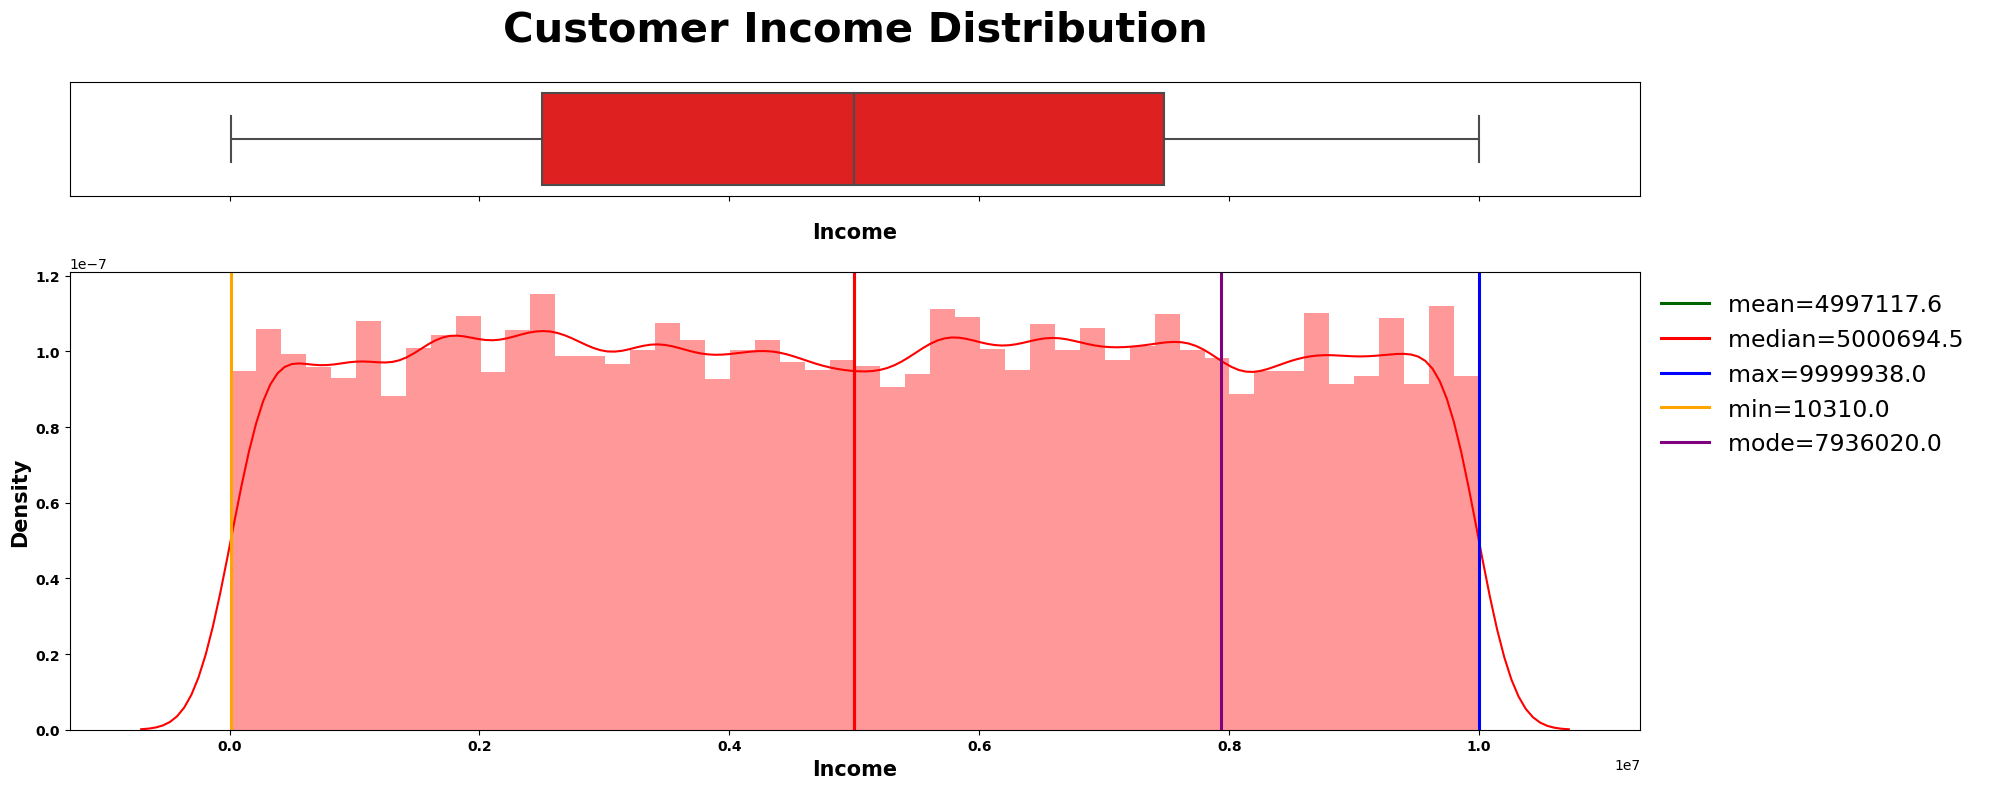

In [127]:
numerical_plotting(data=x1, col="Income", title="Customer Income Distribution", symb=" ", ylabel="Density", color="red");

In [128]:
chebychev(x1.Income, title="Income", interpret=f"at least 75% customer income is lies between 0 and 10.785.254 Rupee")

-------------------- Interpretation of Income --------------------
first calc: -759459.6
second calc: 10753694.8
at least 75% customer income is lies between 0 and 10.785.254 Rupee
----------------------------------------


In [129]:
skew_kurtosis(x1.Income, "Skew & Kurtosis Income")

-------------------- Skew & Kurtosis Income --------------------
Skewness: 0.005956816652394259
Approximately symmetric
-----------------------------------
Kurtosis: -1.1986109225212669
The distribution is too flat
-----------------------------------


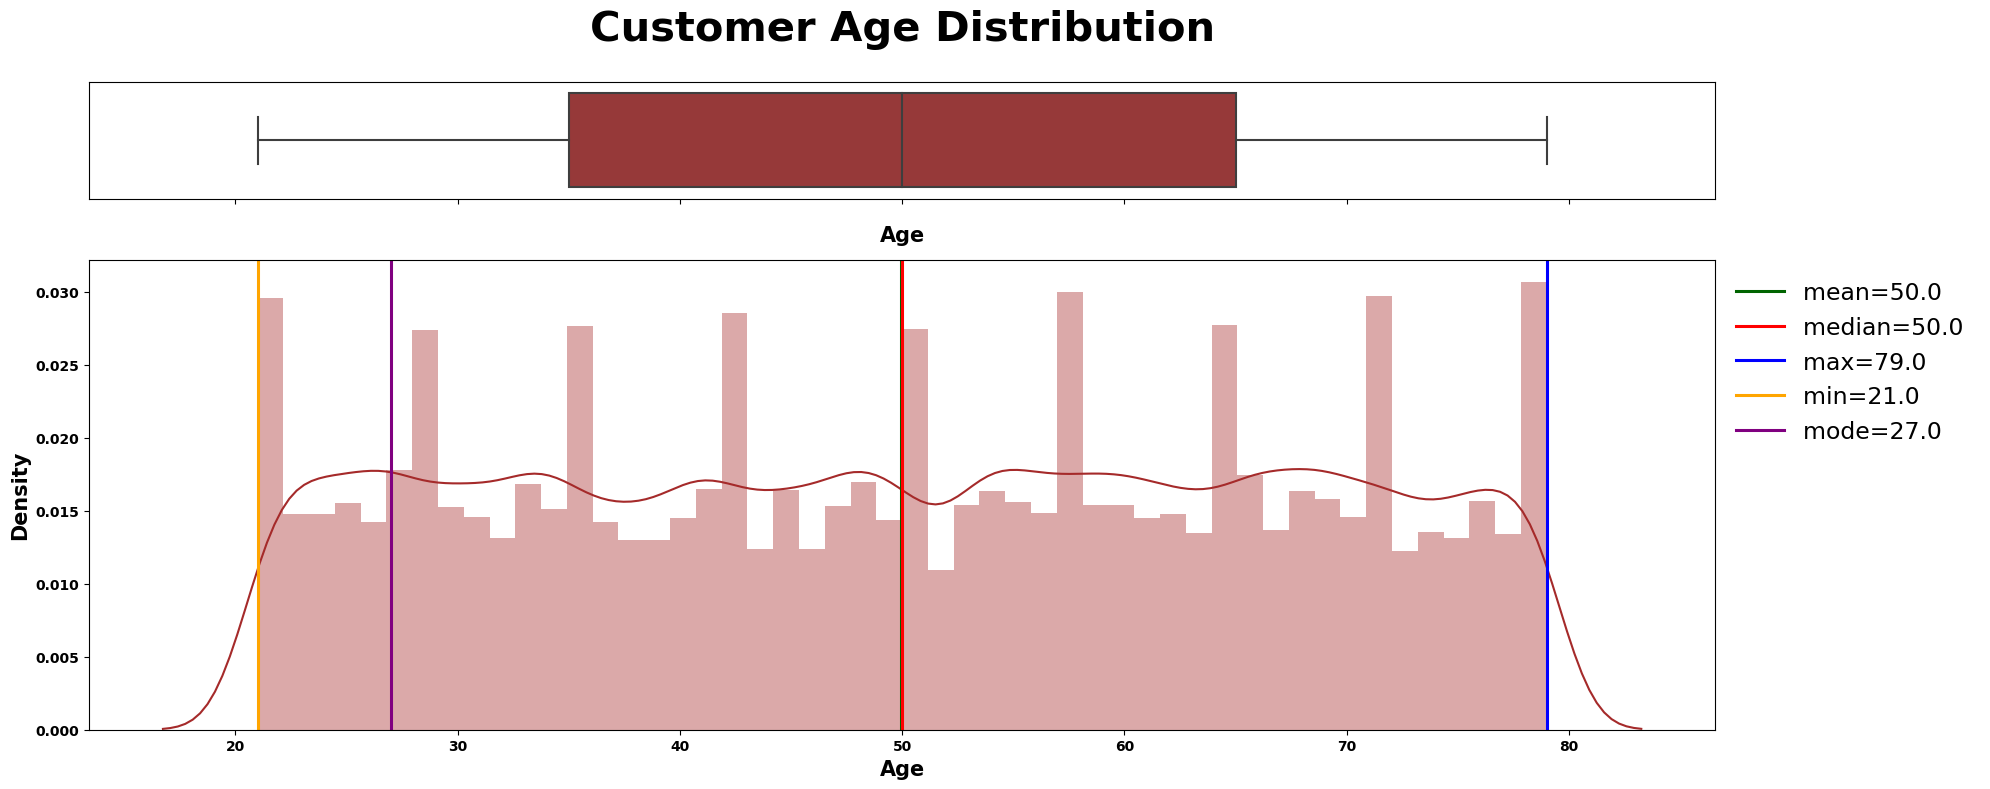

In [130]:
numerical_plotting(data=x1, col="Age", title="Customer Age Distribution", symb=" ", ylabel="Density", color="brown");

In [131]:
chebychev(x1.Age, title="Age", interpret=f"at least 75% customer age is lies between 0 and 84")

-------------------- Interpretation of Age --------------------
first calc: 15.8
second calc: 84.2
at least 75% customer age is lies between 0 and 84
----------------------------------------


In [132]:
skew_kurtosis(x1.Age, "Skew & Kurtosis Age")

-------------------- Skew & Kurtosis Age --------------------
Skewness: -0.005319723892346795
Approximately symmetric
-----------------------------------
Kurtosis: -1.2047344093234011
The distribution is too flat
-----------------------------------


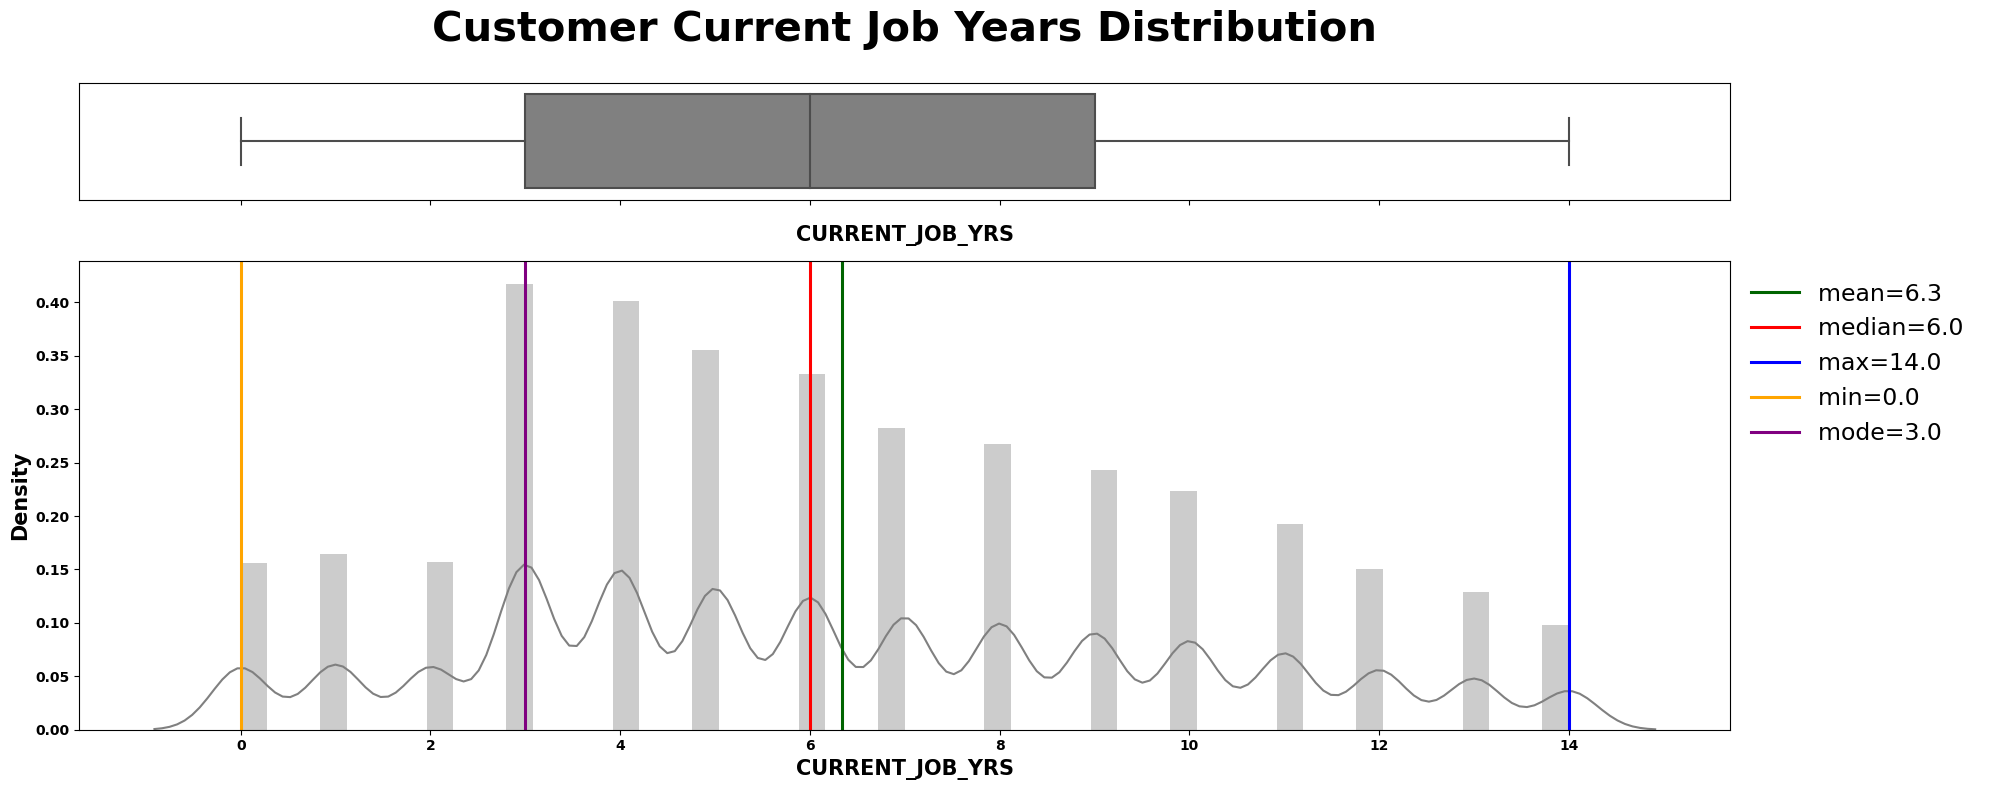

In [133]:
numerical_plotting(data=x1, col="CURRENT_JOB_YRS", 
                   title="Customer Current Job Years Distribution", 
                   symb=" ", ylabel="Density", color="gray");

In [134]:
chebychev(x1.CURRENT_JOB_YRS, title="Current Job Years", 
         interpret=f"at least 75% customer have 0 to 13 years of work experience in current job")

-------------------- Interpretation of Current Job Years --------------------
first calc: -0.9
second calc: 13.5
at least 75% customer have 0 to 13 years of work experience in current job
----------------------------------------


In [73]:
skew_kurtosis(x1.CURRENT_JOB_YRS, "Skew & Kurtosis Current Job Years")

-------------------- Skew & Kurtosis Current Job Years --------------------
Skewness: 0.2731534885191211
Approximately symmetric
-----------------------------------
Kurtosis: -0.7858540256383759
The distribution is non-normal
-----------------------------------


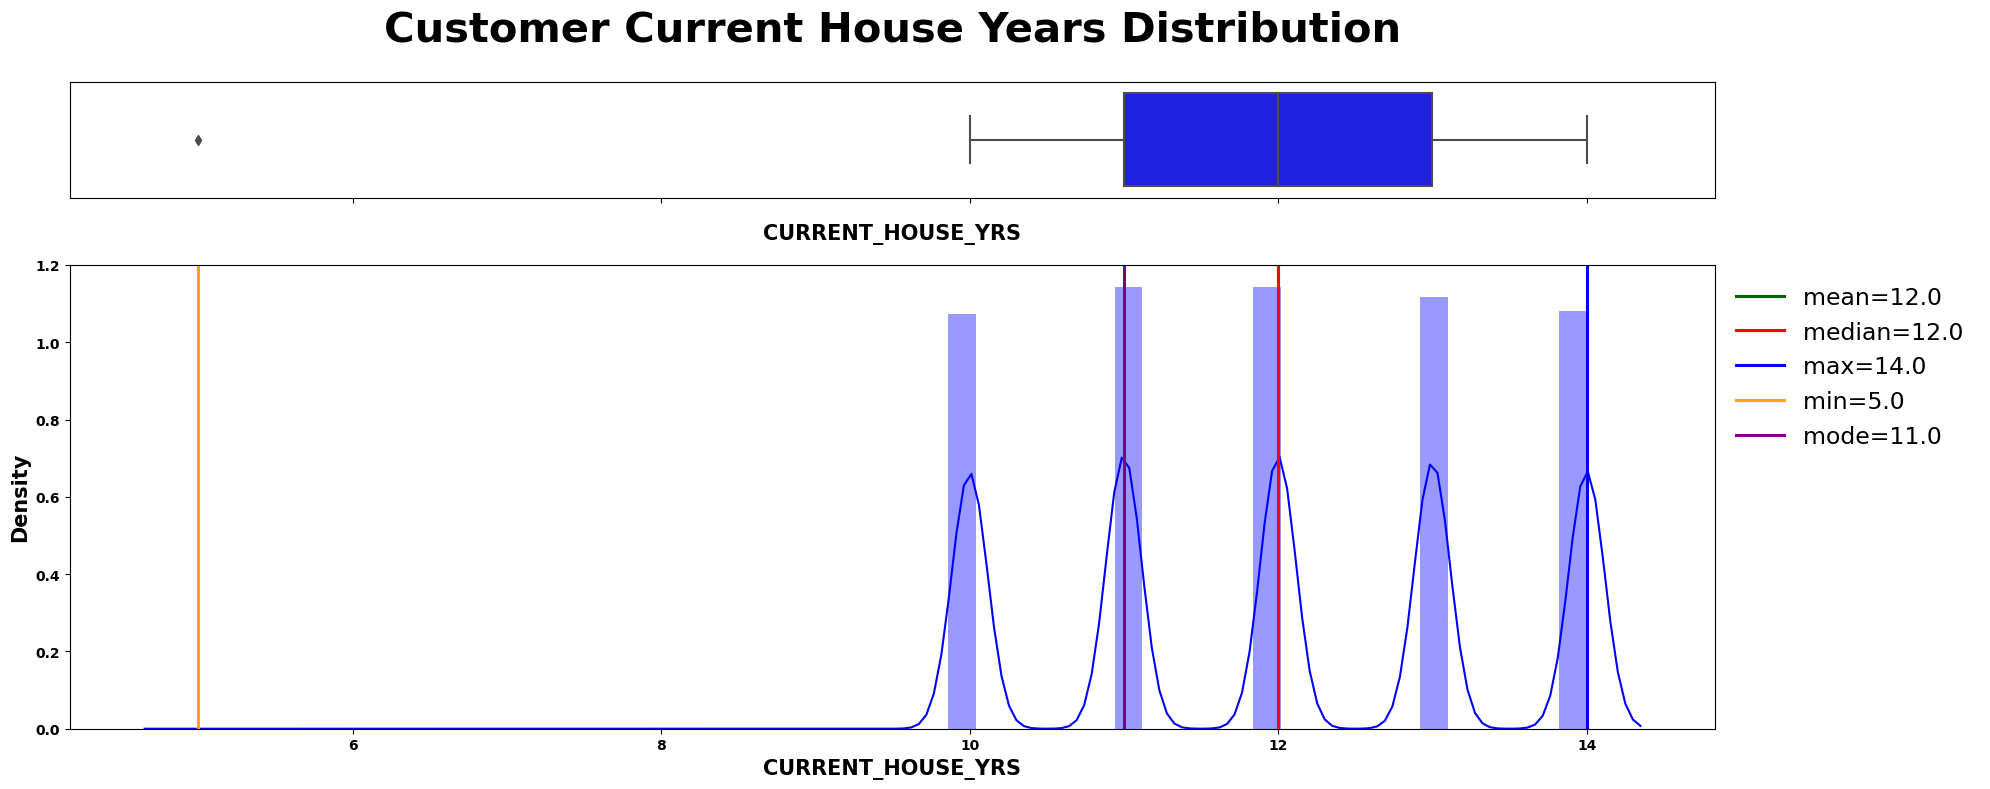

In [74]:
numerical_plotting(data=x1, col="CURRENT_HOUSE_YRS", 
                   title="Customer Current House Years Distribution", 
                   symb=" ", ylabel="Density", color="blue");

In [75]:
chebychev(x1.CURRENT_HOUSE_YRS, title="Current House Years", 
          interpret=f"at least 75% customer have lived 9 to 15 years in the current residence")

-------------------- Interpretation of Current House Years --------------------
first calc: 9.2
second calc: 14.8
at least 75% customer have lived 9 to 15 years in the current residence
----------------------------------------


In [76]:
skew_kurtosis(x1.CURRENT_HOUSE_YRS, "Skew & Kurtosis Current House Years")

-------------------- Skew & Kurtosis Current House Years --------------------
Skewness: 0.006326672635466746
Approximately symmetric
-----------------------------------
Kurtosis: -1.27268812804863
The distribution is too flat
-----------------------------------


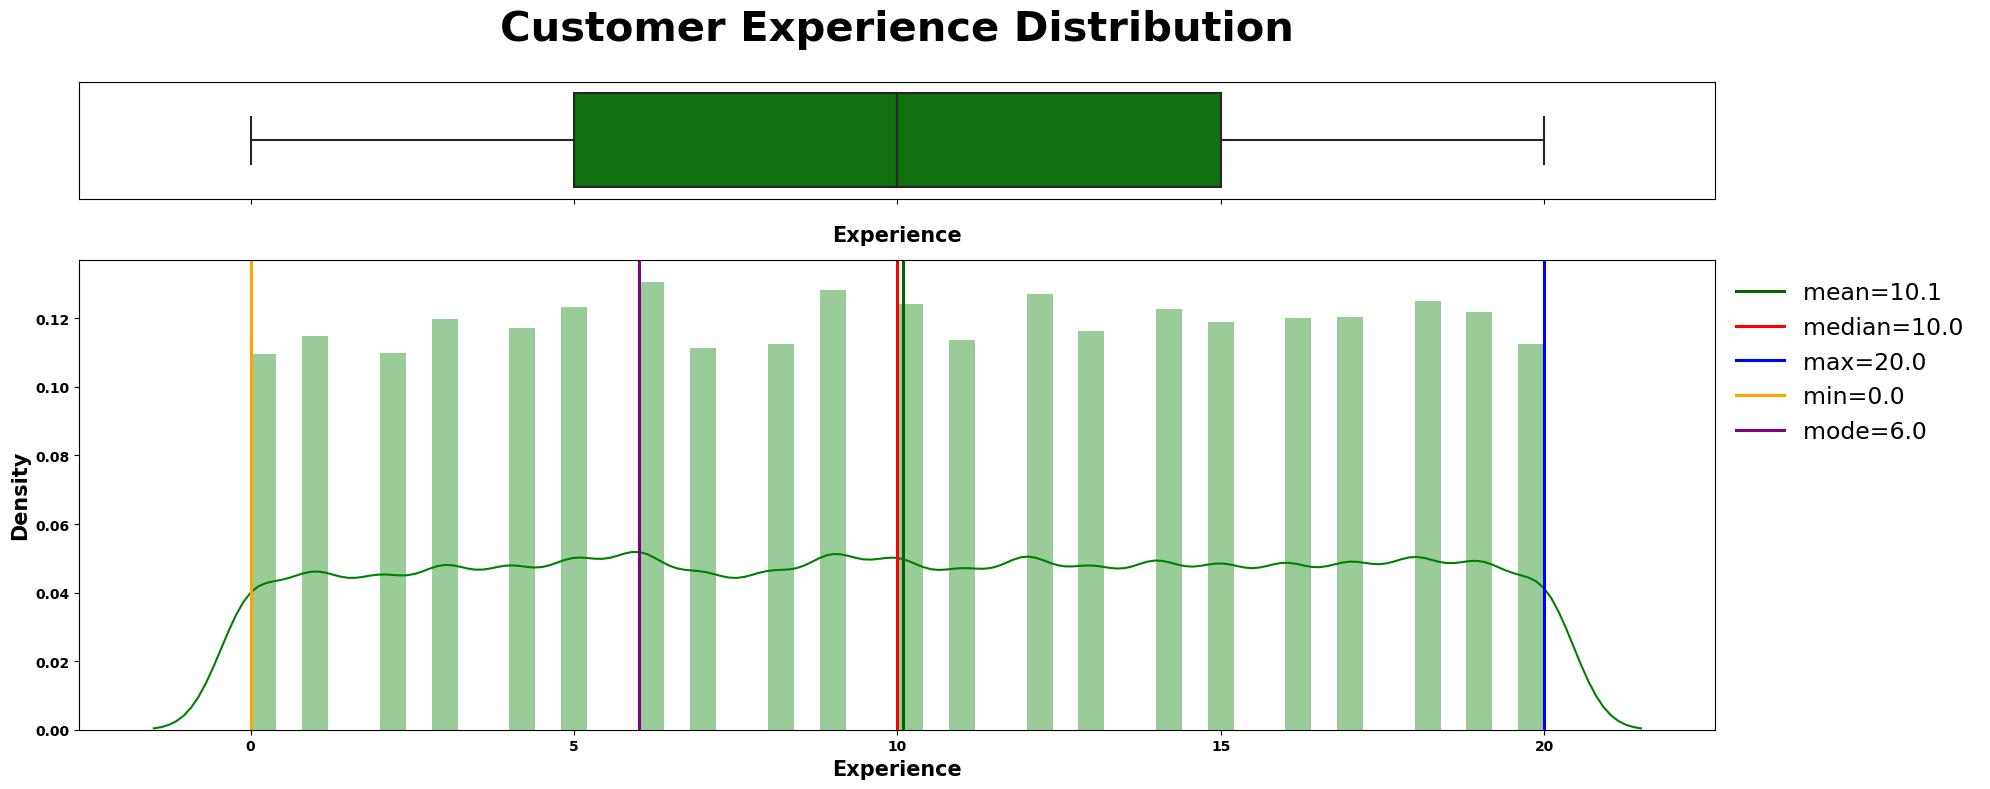

In [77]:
numerical_plotting(data=x1, col="Experience", 
                   title="Customer Experience Distribution", 
                   symb=" ", ylabel="Density", color="green");

In [78]:
chebychev(x1.Experience, title="Experience", 
          interpret=f"at least 75% customer have 0 to 22 years professional experience of working")


-------------------- Interpretation of Experience --------------------
first calc: -1.9
second calc: 22.1
at least 75% customer have 0 to 22 years professional experience of working
----------------------------------------


In [79]:
skew_kurtosis(x1.Experience, "Skew & Kurtosis Experience")

-------------------- Skew & Kurtosis Experience --------------------
Skewness: -0.01278216841384548
Approximately symmetric
-----------------------------------
Kurtosis: -1.194886304068832
The distribution is too flat
-----------------------------------


In [80]:
#Categorical Column


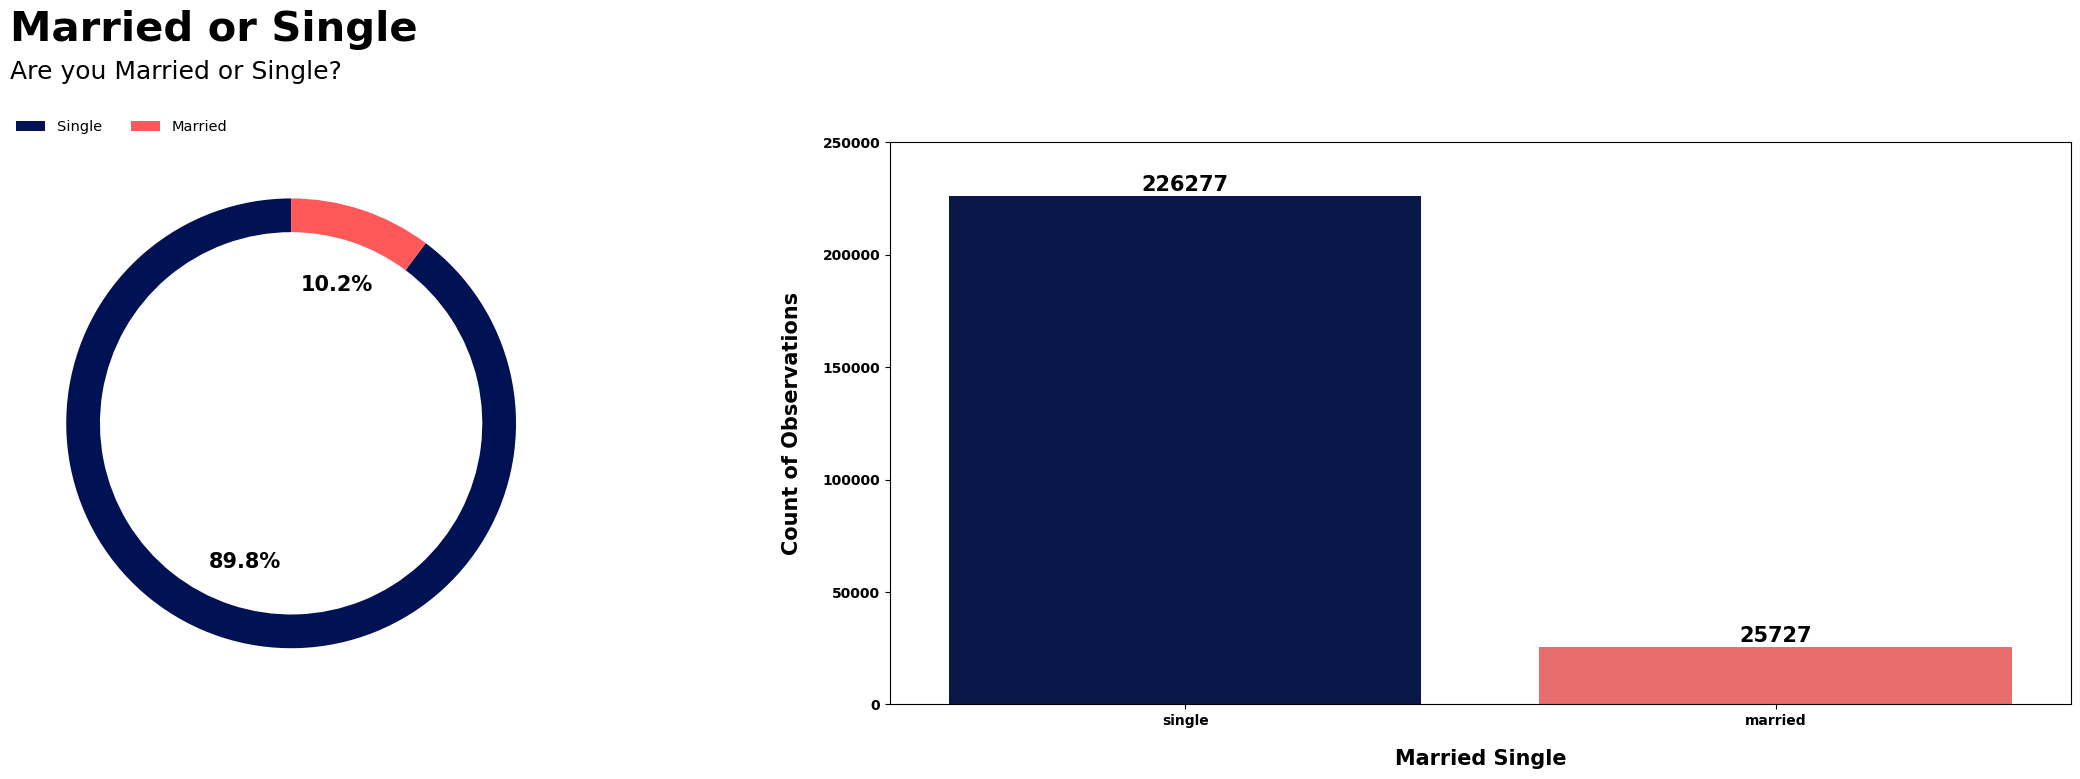

In [81]:
loan_married_single = x1["Marital_Status"].value_counts()

count_pie_plot(datapie=loan_married_single,
               datacount=x1,
               colcount="Marital_Status",
               colpiey=loan_married_single.values,
               text1="Married or Single",
               pielabels=["Single", "Married"],
               text2="Are you Married or Single?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Married Single",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["single", "married"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

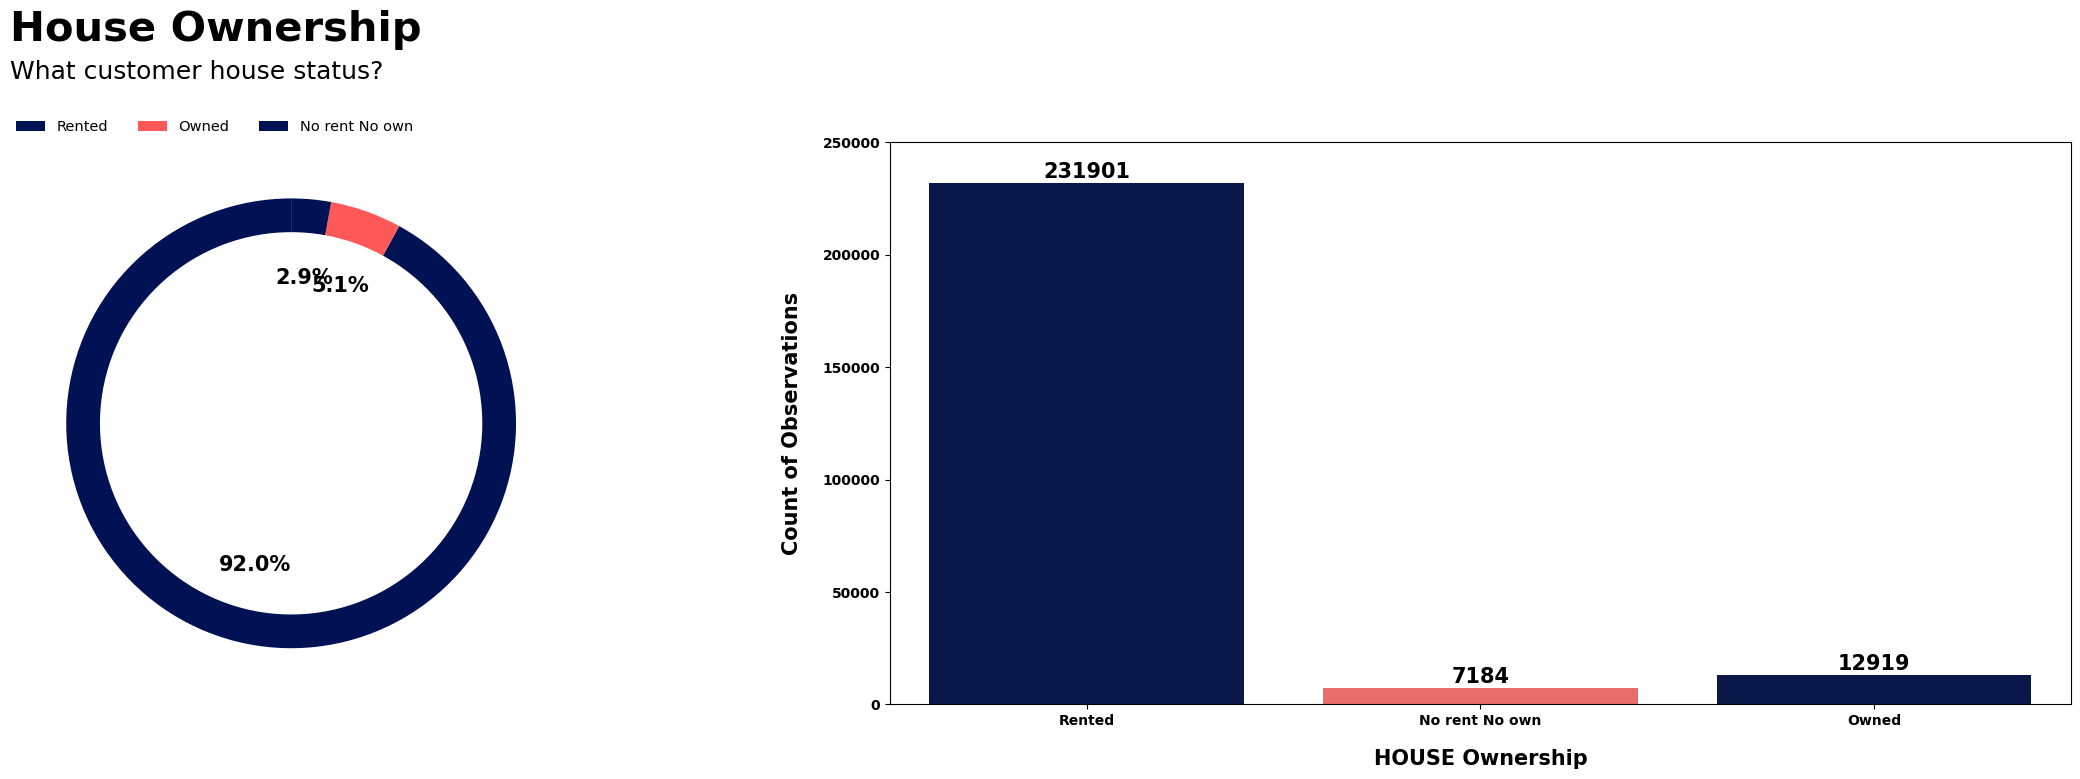

In [82]:
loan_house_ownership = x1["House_Ownership"].value_counts()

count_pie_plot(datapie=loan_house_ownership,
               datacount=x1,
               colcount="House_Ownership",
               colpiey=loan_house_ownership.values,
               text1="House Ownership",
               pielabels=["Rented", "Owned", "No rent No own"],
               text2="What customer house status?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="HOUSE Ownership",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Rented", "No rent No own", "Owned"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

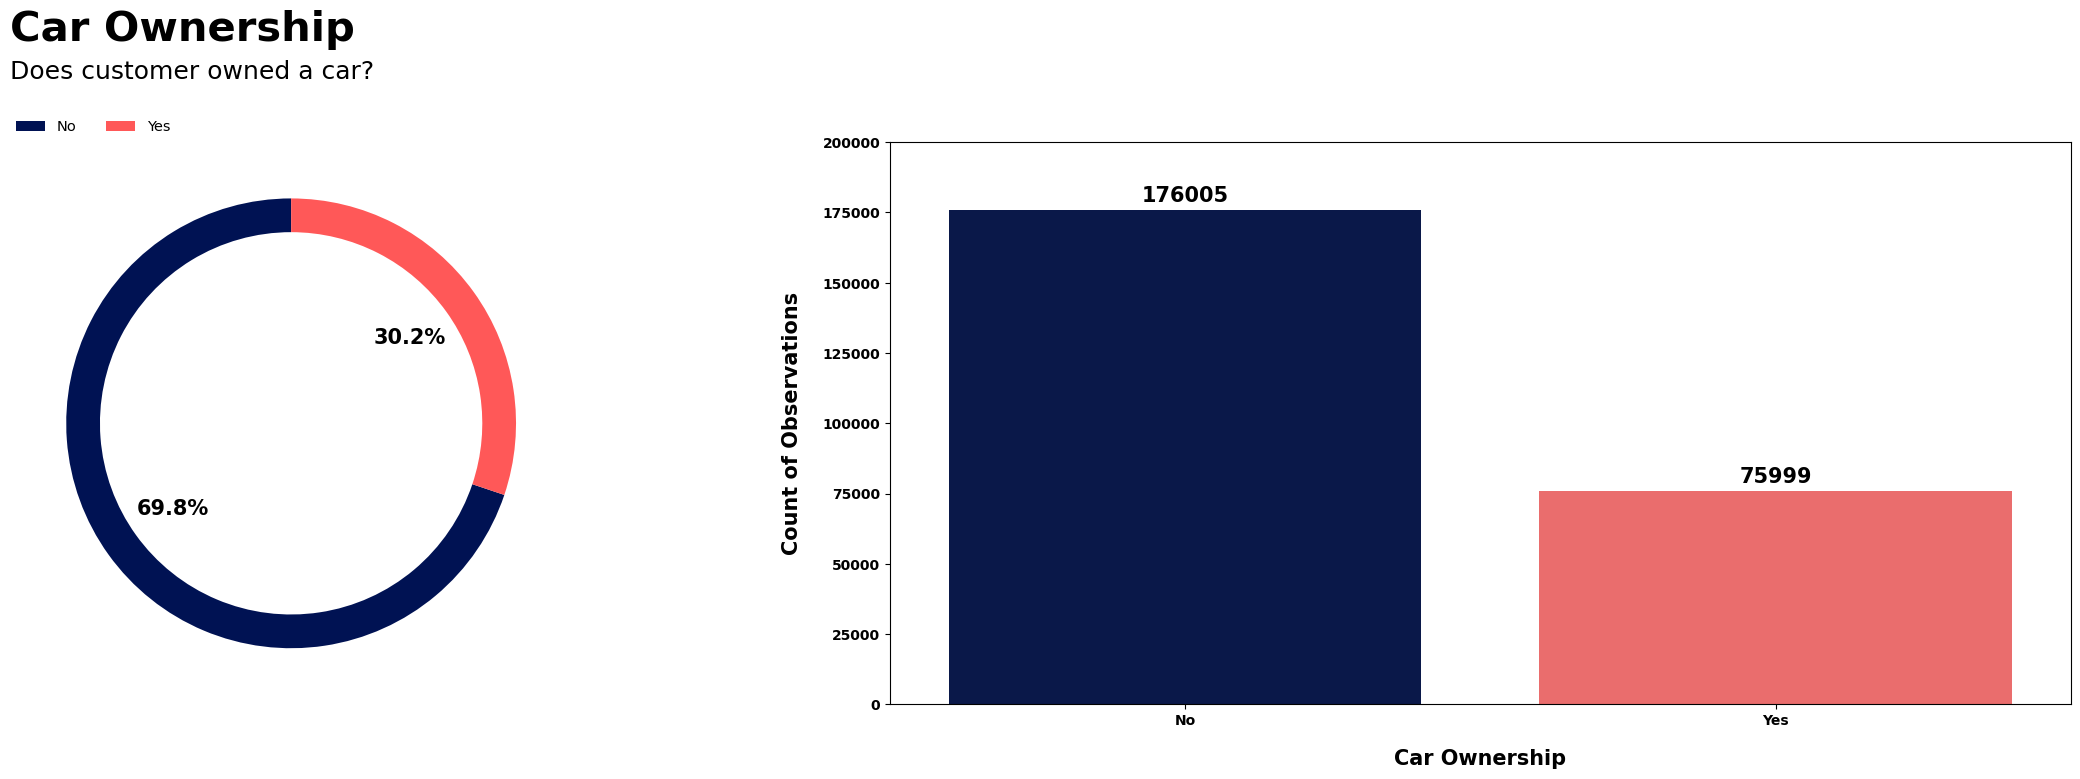

In [83]:
loan_car_ownership = x1["Car_Ownership"].value_counts()

count_pie_plot(datapie=loan_car_ownership,
               datacount=x1,
               colcount="Car_Ownership",
               colpiey=loan_car_ownership.values,
               text1="Car Ownership",
               pielabels=["No", "Yes"],
               text2="Does customer owned a car?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Car Ownership",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["No", "Yes"],
               yticklabel=list(np.arange(0, 225000, 25000)),
               ystart=0,
               yend=200000);

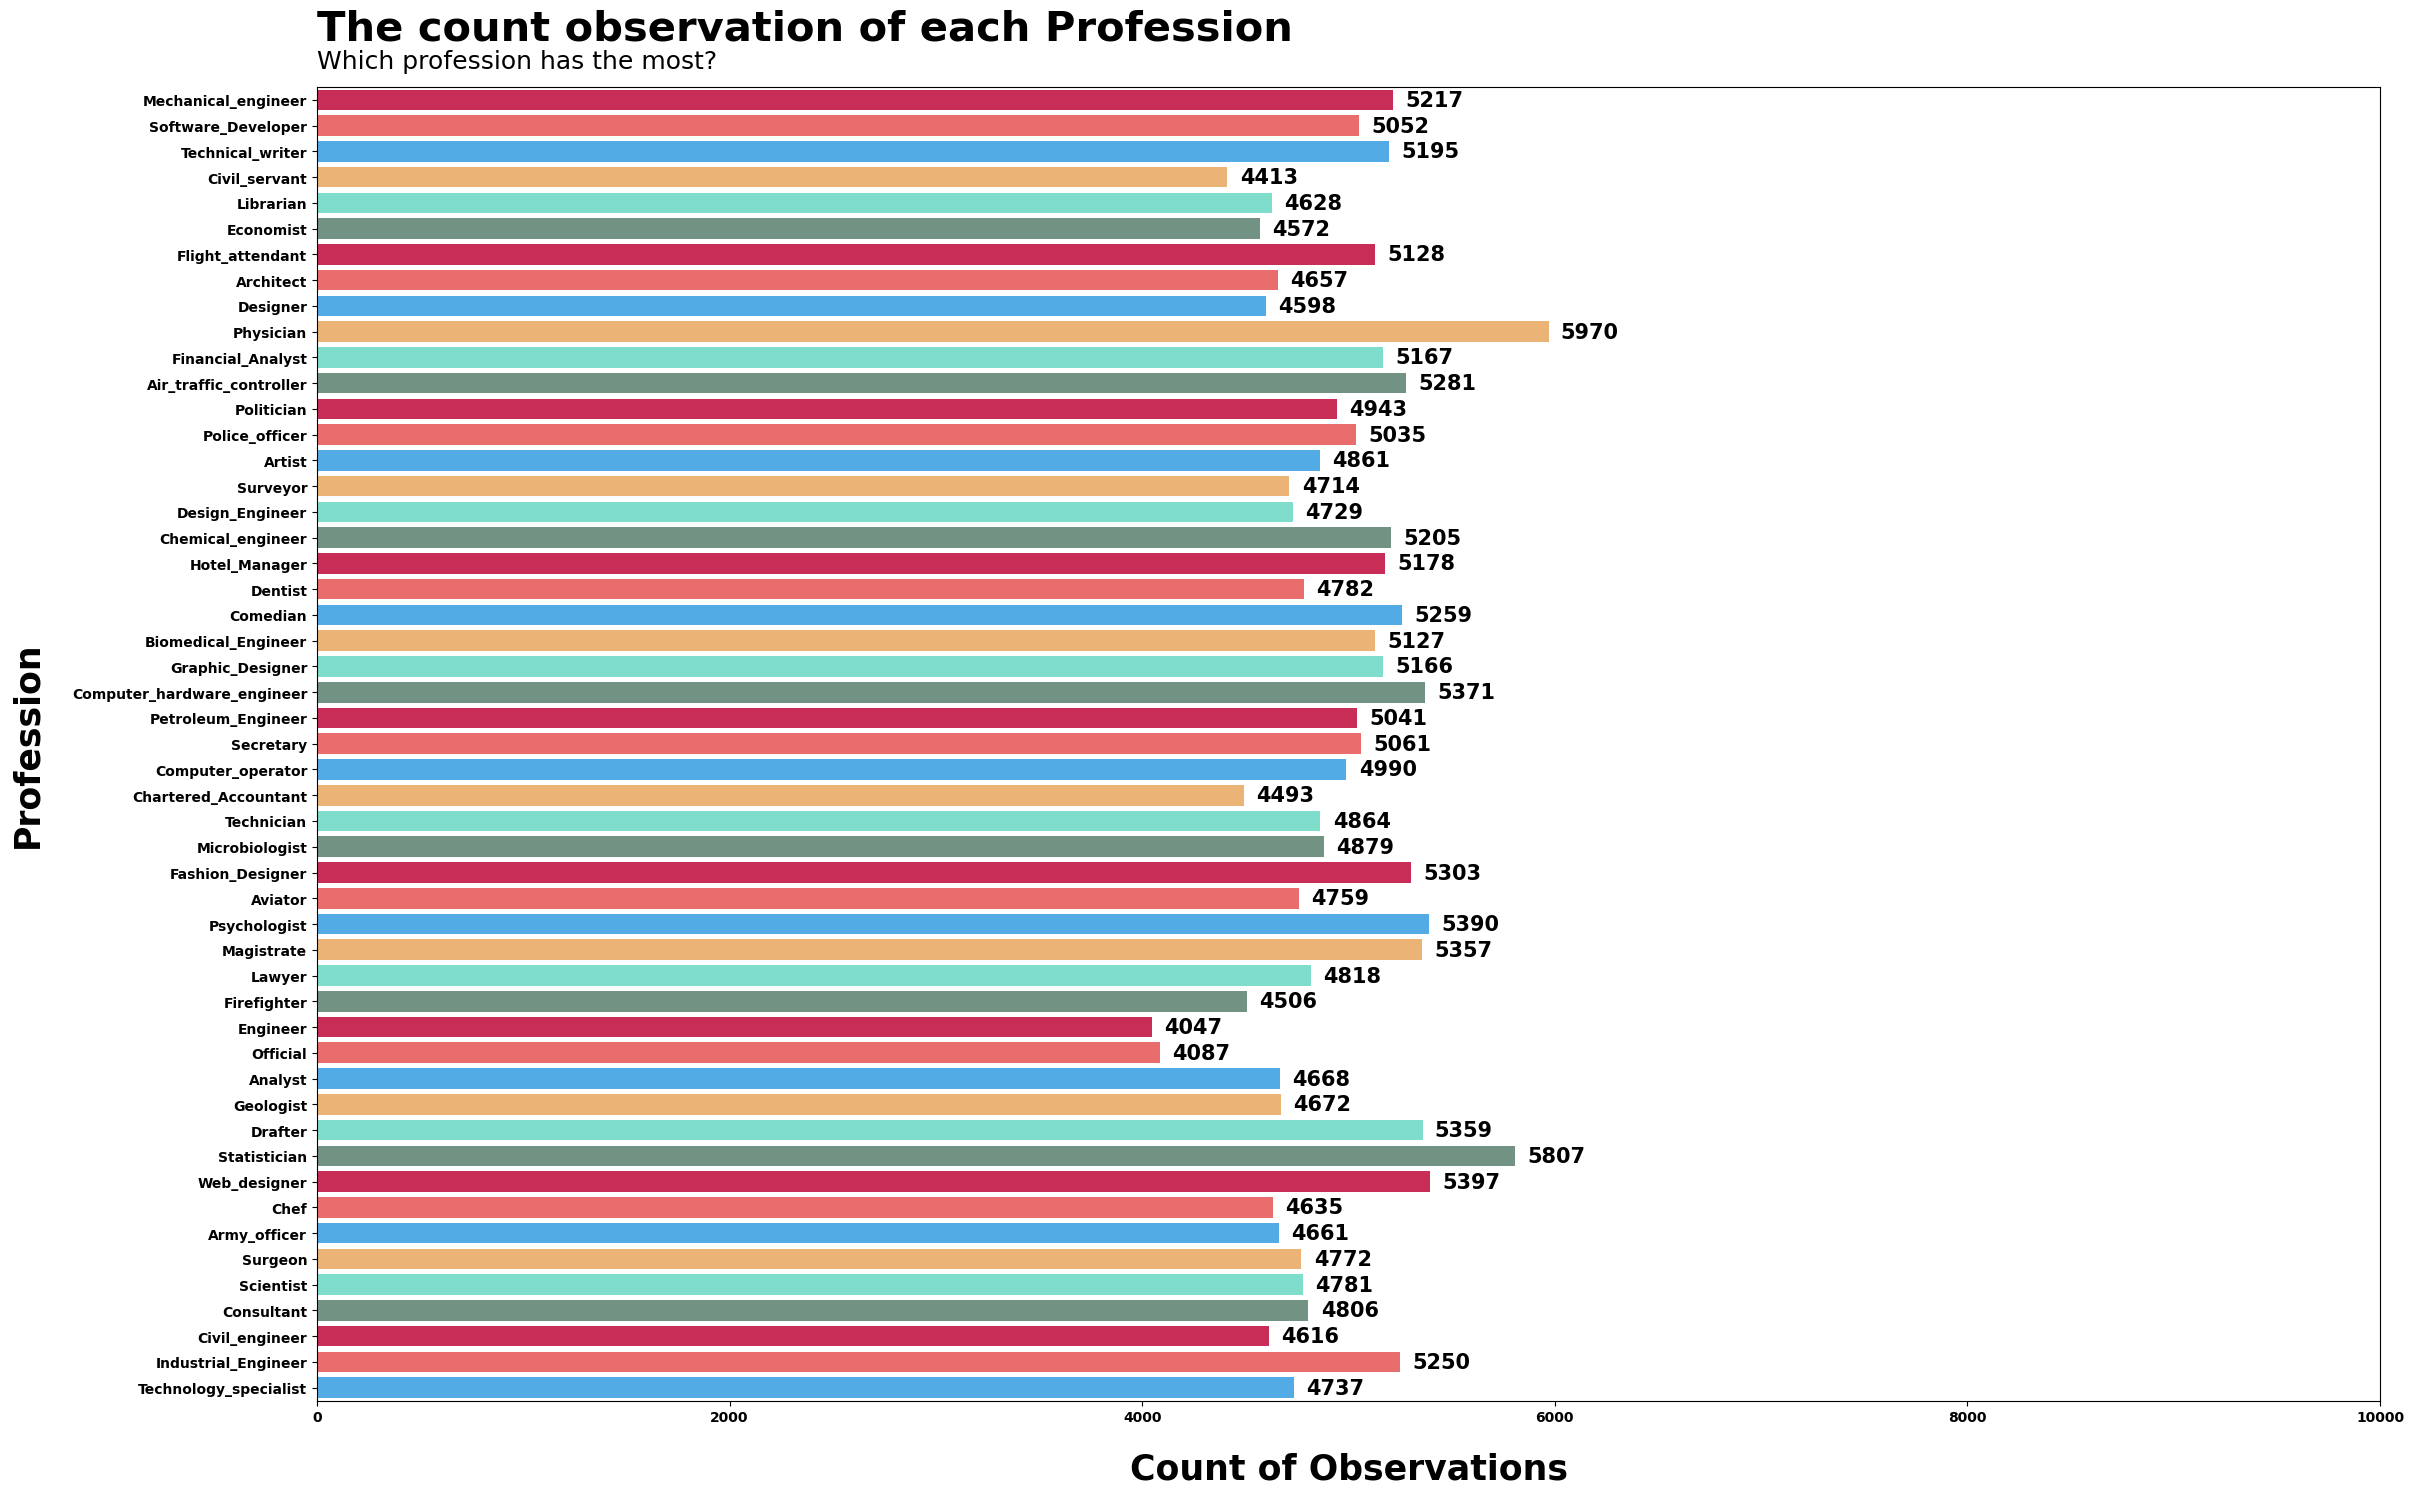

In [84]:
data = x1
coly = "Profession"
sizey = 15
text1 = "The count observation of each Profession"
text2 = "Which profession has the most?"
xlabel = "Count of Observations"
ylabel = "Profession"
xstart, xend = 0, 10000
xplus = 200
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1, 
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

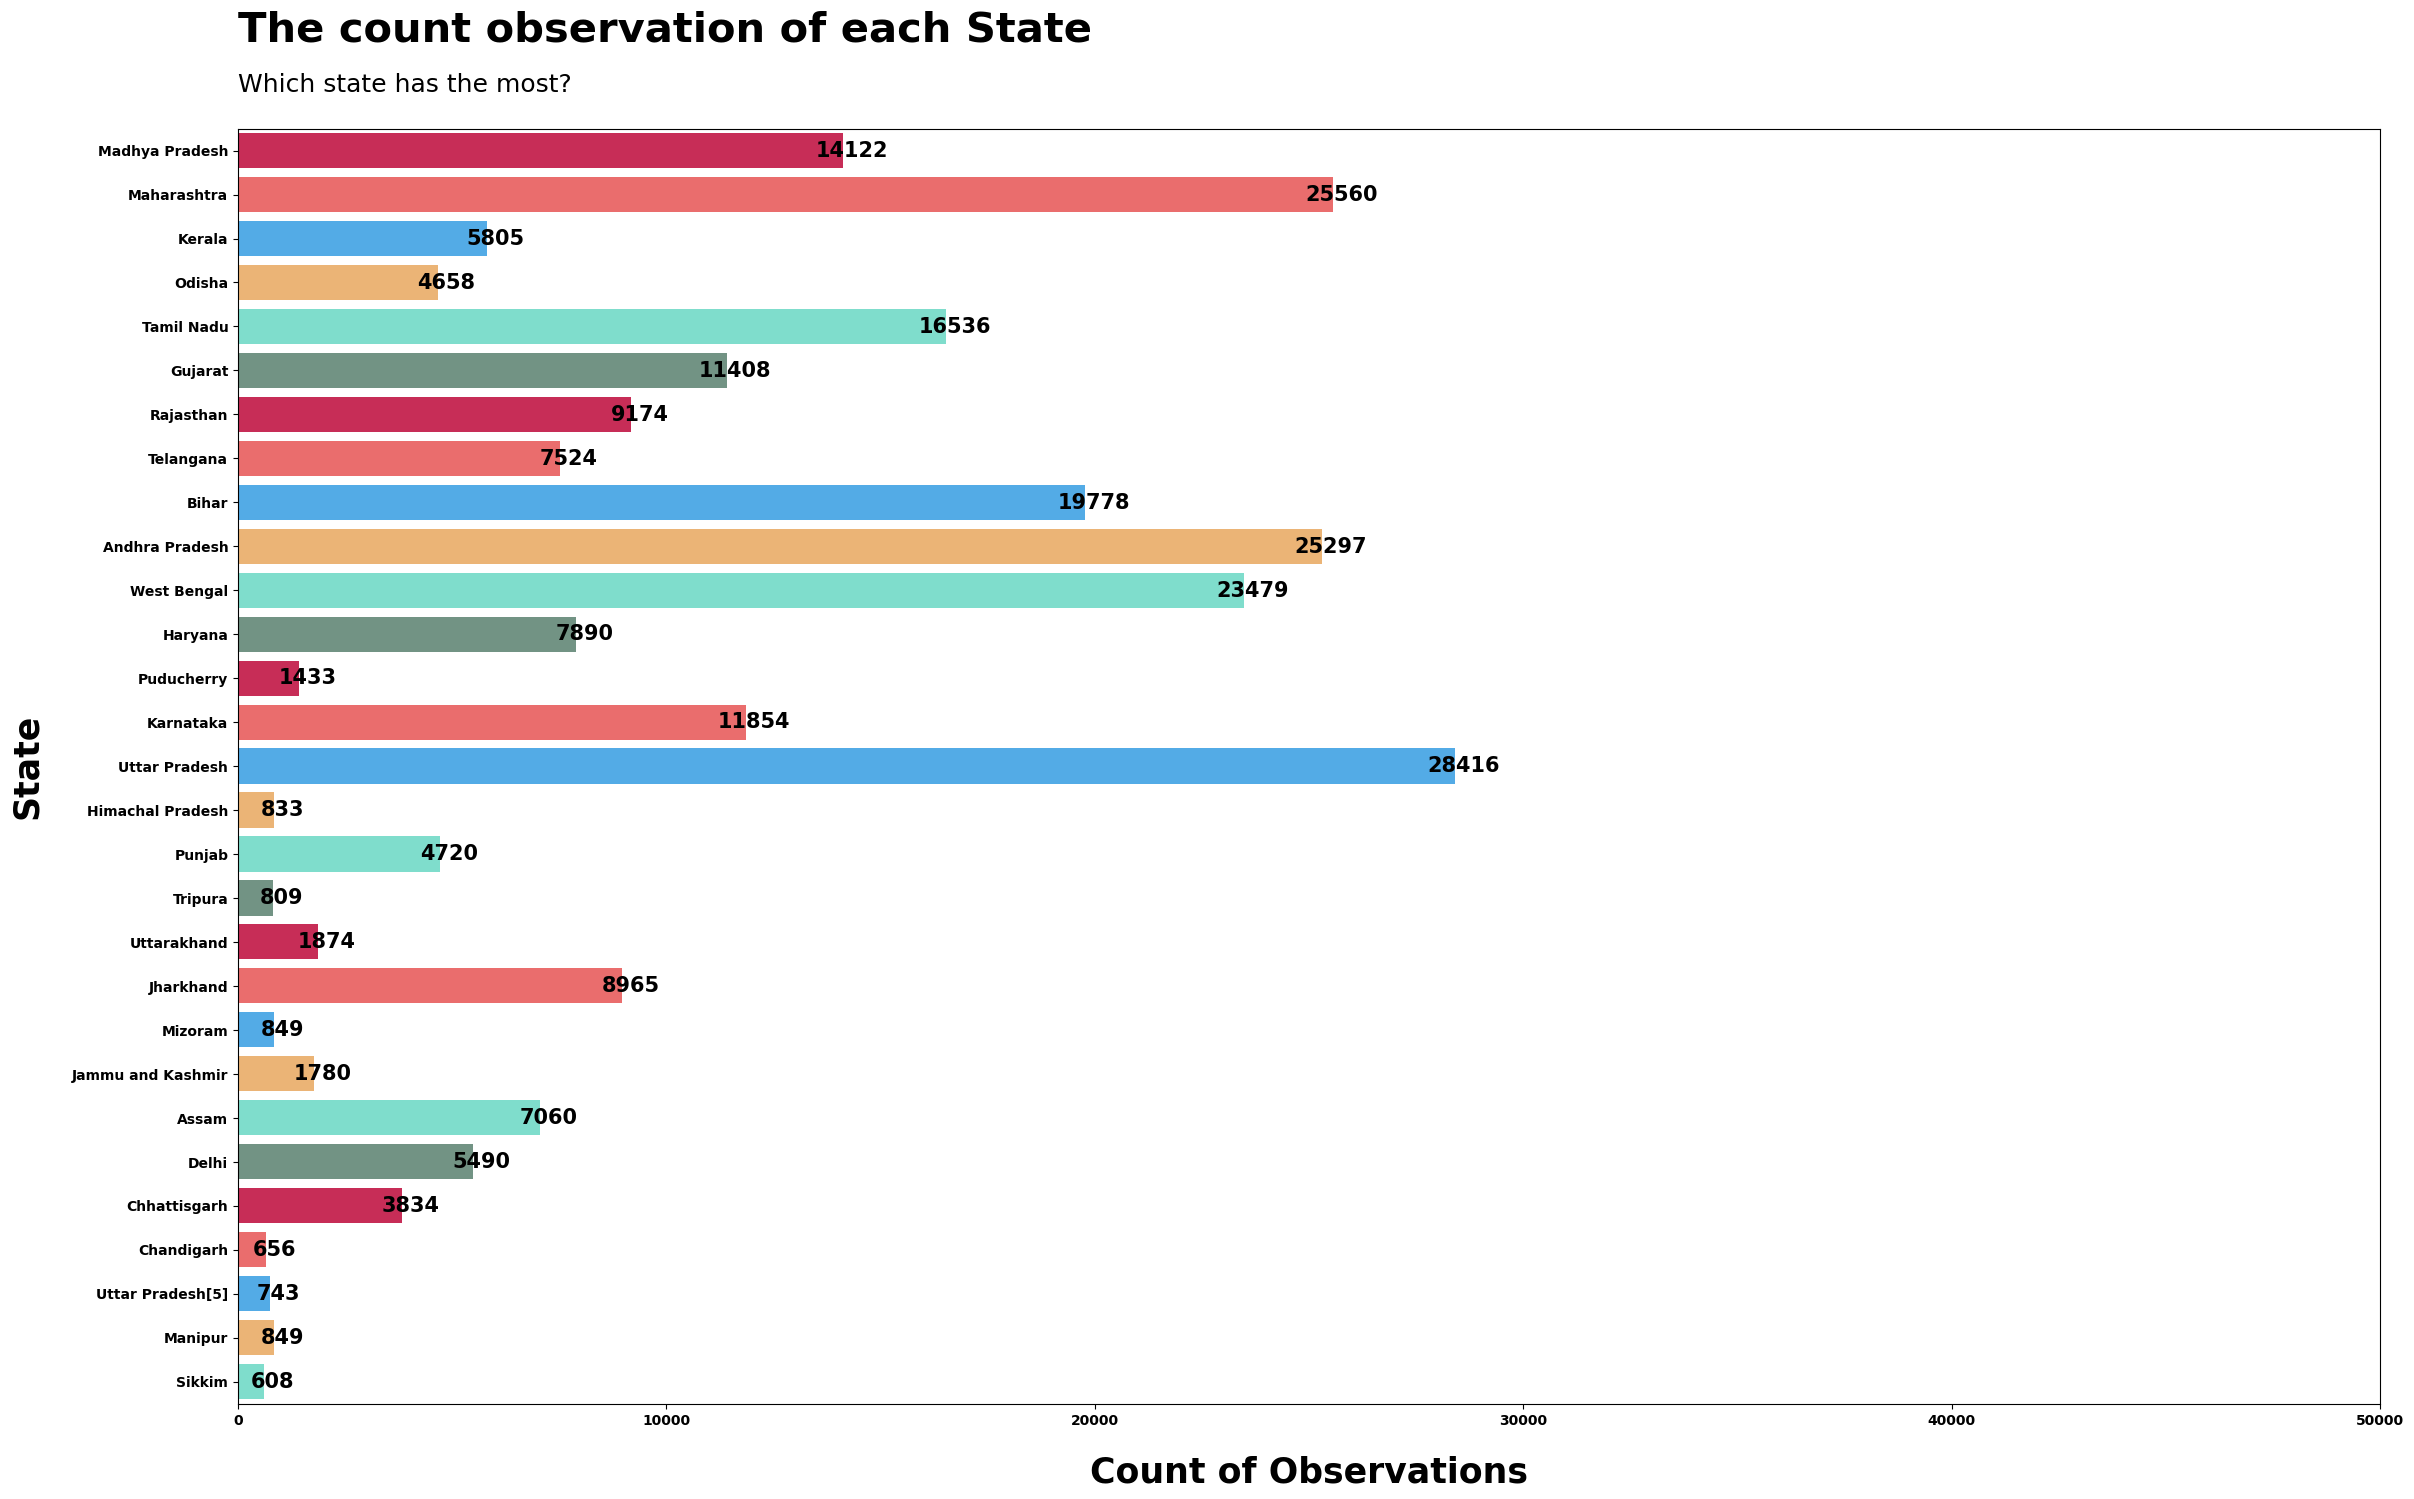

In [85]:
data = x1
coly = "Rev_State"
sizey = 15
text1 = "The count observation of each State"
text2 = "Which state has the most?"
xlabel = "Count of Observations"
ylabel = "State"
xstart, xend = 0, 50000
xplus = 200
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);


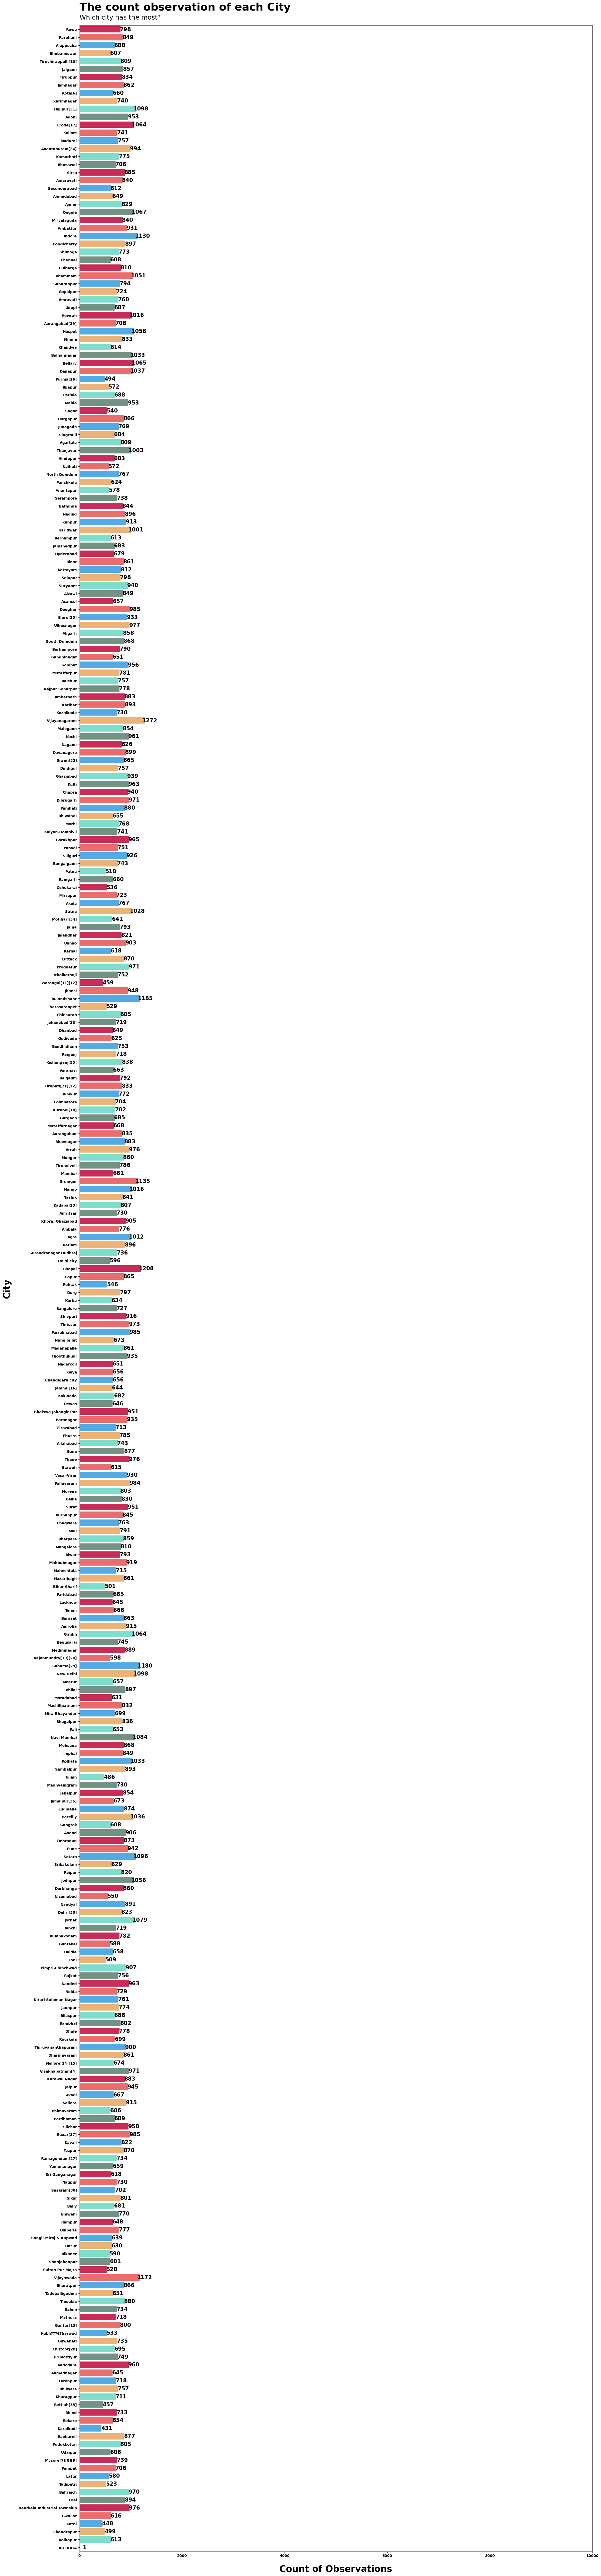

In [86]:
data = x1
coly = "Rev_CITY"
sizey = 100
text1 = "The count observation of each City"
text2 = "Which city has the most?"
xlabel = "Count of Observations"
ylabel = "City"
xstart, xend = 0, 10000
xplus = 100
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

In [87]:
#5.3  Bivariate Analysis
#5.3.1 | Numerical Column

In [88]:
pearson_correlation(x1["Income"], x1["Risk_Flag"], "Income & Risk Flag Correlation")

--------------- Income & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.003

Samples are uncorrelated (fail to reject H0) p=0.119



In [89]:
pearson_correlation(x1["Age"], x1["Risk_Flag"], "Age & Risk Flag Correlation")

--------------- Age & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.022

Samples are correlated (reject H0) p=0.000



In [90]:
pearson_correlation(x1["CURRENT_JOB_YRS"], x1["Risk_Flag"], "CURRENT_JOB_YRS & Risk Flag Correlation")

--------------- CURRENT_JOB_YRS & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.017

Samples are correlated (reject H0) p=0.000



In [91]:
pearson_correlation(x1["CURRENT_HOUSE_YRS"], x1["Risk_Flag"], "CURRENT_HOUSE_YRS & Risk Flag Correlation")

--------------- CURRENT_HOUSE_YRS & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.004

Samples are correlated (reject H0) p=0.029



In [92]:
pearson_correlation(x1["Experience"], x1["Risk_Flag"], "Experience & Risk Flag Correlation")

--------------- Experience & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.035

Samples are correlated (reject H0) p=0.000



In [93]:
#5.3.2 Categorical Column

In [94]:
spearman_correlation(data1=x1["Marital_Status"], data2=x1["Risk_Flag"], title="Marital_Status & Risk Flag Correlation")

--------------- Marital_Status & Risk Flag Correlation ---------------

Spearmans correlation coefficient: 0.021

Samples are correlated (reject H0) p=0.000



In [95]:
spearman_correlation(data1=x1["Car_Ownership"], data2=x1["Risk_Flag"], title="Car Ownership & Risk Flag Correlation")

--------------- Car Ownership & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.024

Samples are correlated (reject H0) p=0.000



In [96]:
spearman_correlation(data1=x1["Profession"], data2=x1["Risk_Flag"], title="Profession & Risk Flag Correlation")

--------------- Profession & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.005

Samples are correlated (reject H0) p=0.017



In [97]:
spearman_correlation(data1=x1["House_Ownership"], data2=x1["Risk_Flag"], title="House_Ownership & Risk Flag Correlation")

--------------- House_Ownership & Risk Flag Correlation ---------------

Spearmans correlation coefficient: 0.026

Samples are correlated (reject H0) p=0.000



In [98]:
spearman_correlation(data1=x1["Rev_CITY"], data2=x1["Risk_Flag"], title="CITY & Risk Flag Correlation")

--------------- CITY & Risk Flag Correlation ---------------

Spearmans correlation coefficient: 0.005

Samples are correlated (reject H0) p=0.021



In [99]:
spearman_correlation(data1=x1["Rev_State"], data2=x1["Risk_Flag"], title="Rev_State & Risk Flag Correlation")

--------------- Rev_State & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.003

Samples are uncorrelated (fail to reject H0) p=0.141



In [100]:
#5.4  Multivariate Analysis
#5.4.1  Categorical Columnmmmmmm

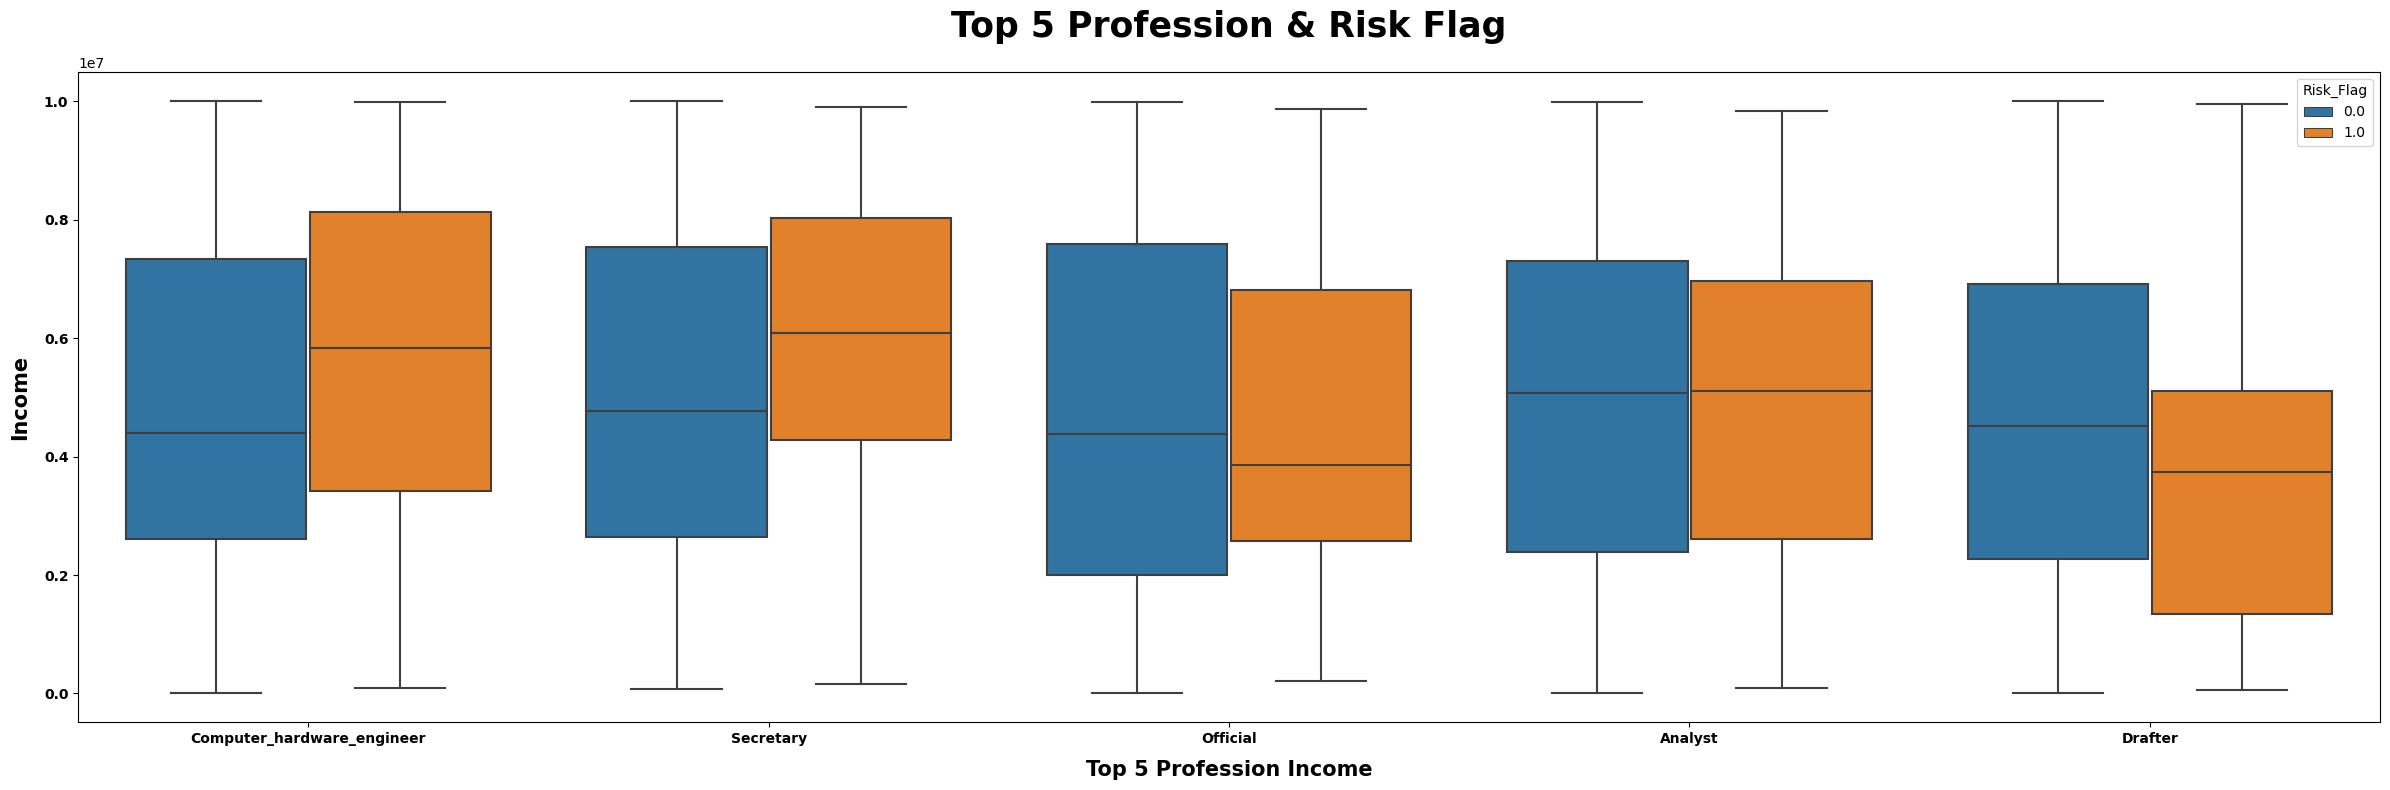

In [101]:
I = (x1.loc[x1["Profession"]
         .isin(["Drafter", "Secretary", "Computer_hardware_engineer", "Analyst", "Official"])]
         .loc[:, ["Income", "Profession", "Risk_Flag"]])

data = I
title = "Top 5 Profession & Risk Flag"
x = "Profession"
y = "Income"
hue = "Risk_Flag"
xlabel = "Top 5 Profession Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

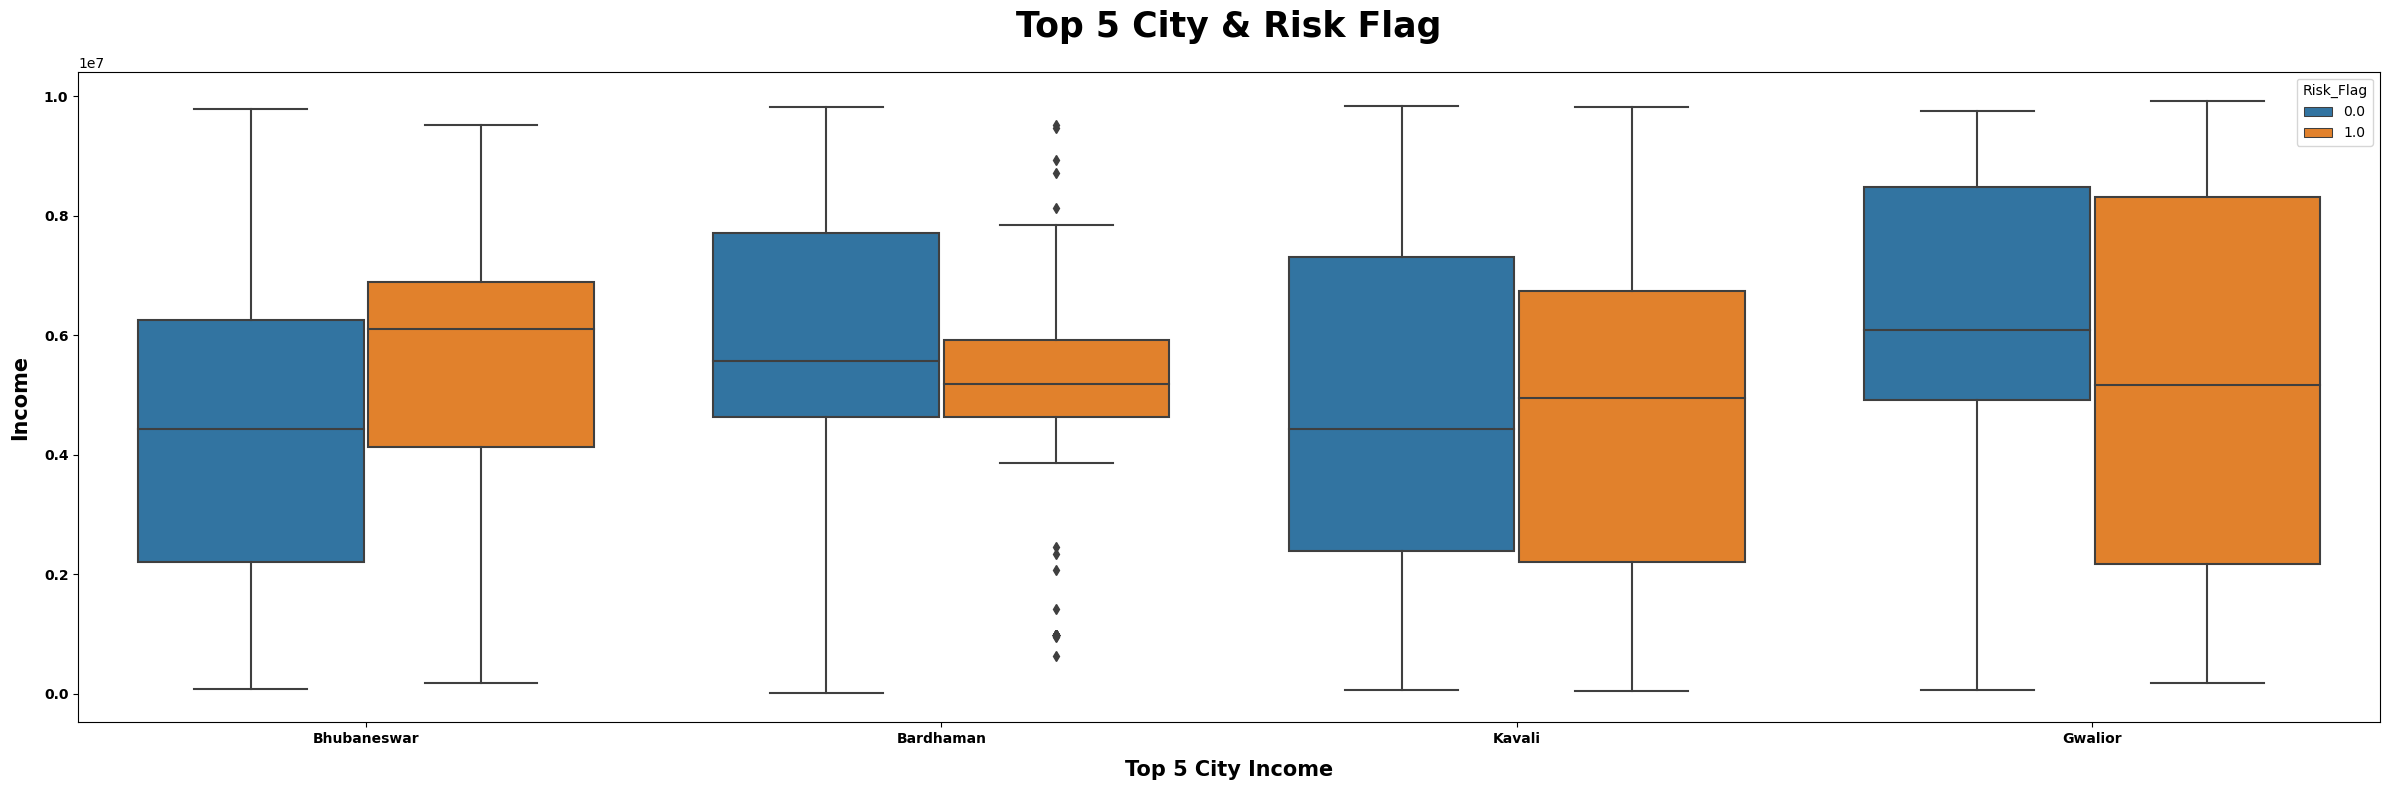

In [102]:
C = (x1.loc[x1["Rev_CITY"]
         .isin(["Bhubaneswar", "Bettiah", "Gwalior", "Kavali","Bardhaman"])]
         .loc[:, ["Income", "Rev_CITY", "Risk_Flag"]])

data = C
title = "Top 5 City & Risk Flag"
x = "Rev_CITY"
y = "Income"
hue = "Risk_Flag"
xlabel = "Top 5 City Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

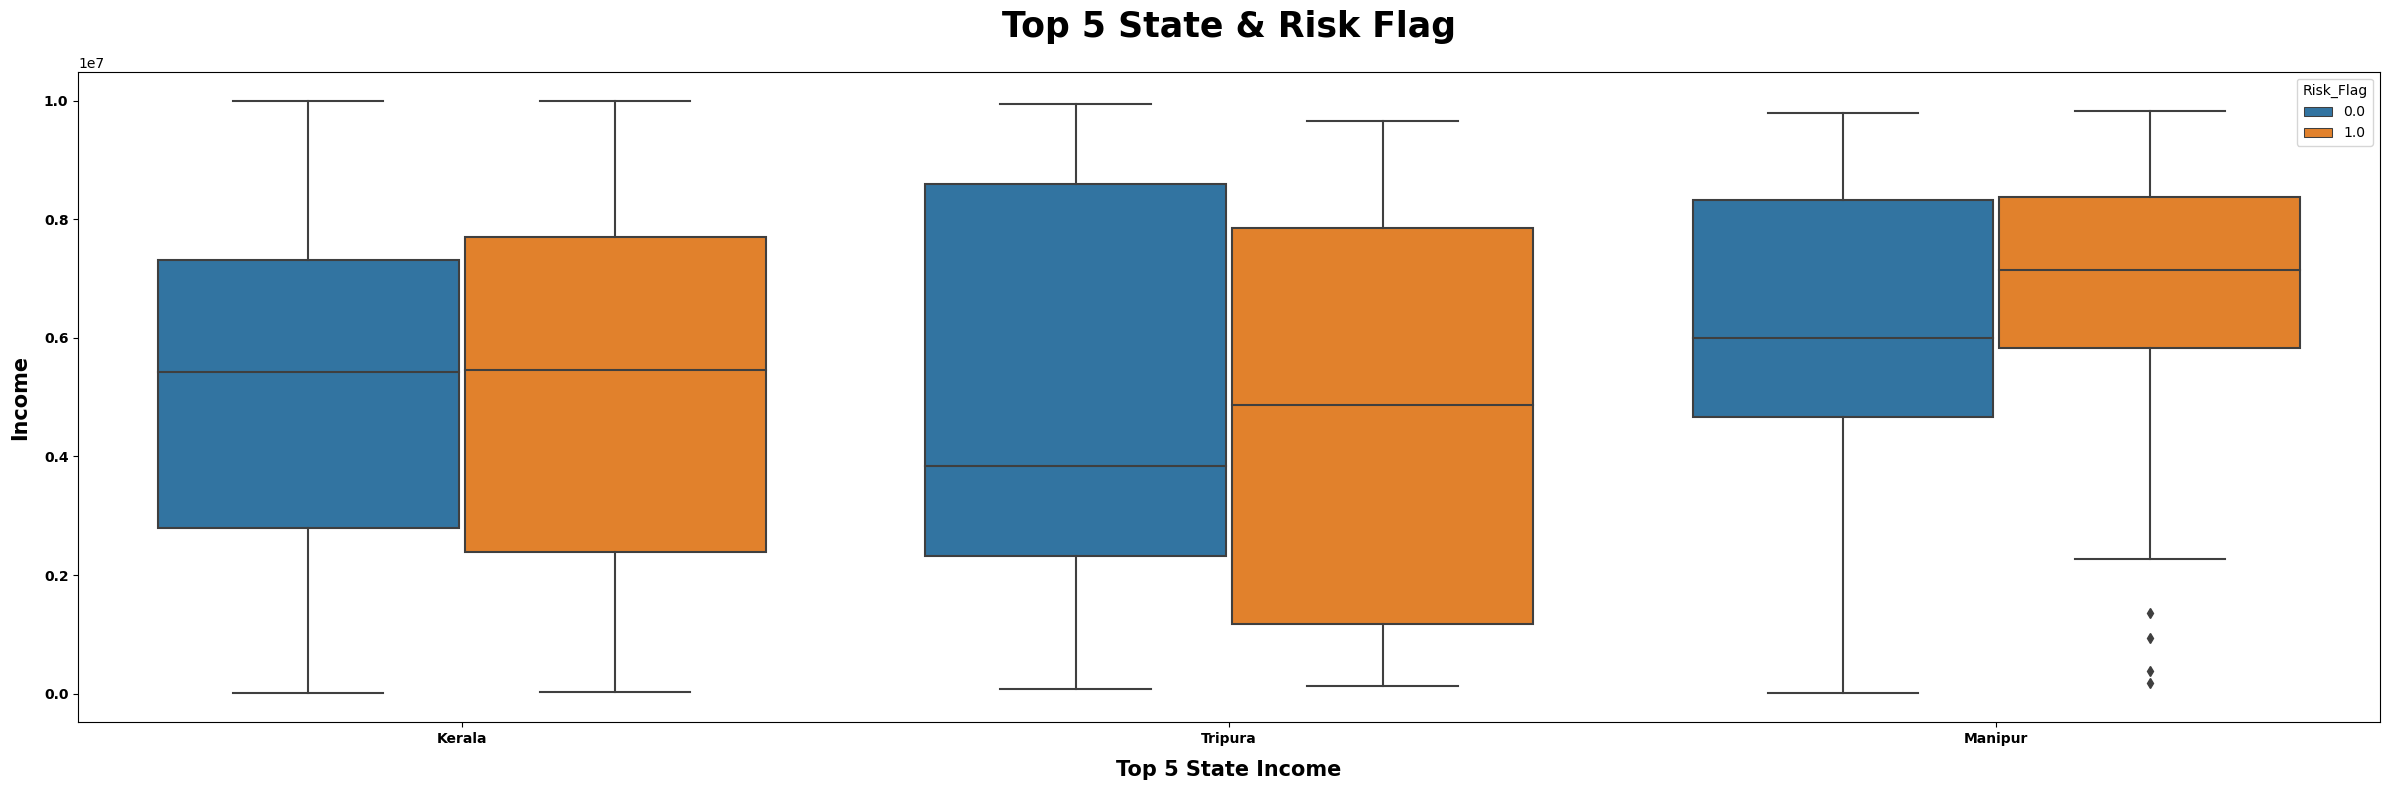

In [103]:
S = (x1.loc[x1["Rev_State"]
         .isin(["Manipur", "Kerala", "Tripura", "Madhya", "Jammu"])]
         .loc[:, ["Income", "Rev_State", "Risk_Flag"]])

data = S
title = "Top 5 State & Risk Flag"
x = "Rev_State"
y = "Income"
hue = "Risk_Flag"
xlabel = "Top 5 State Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

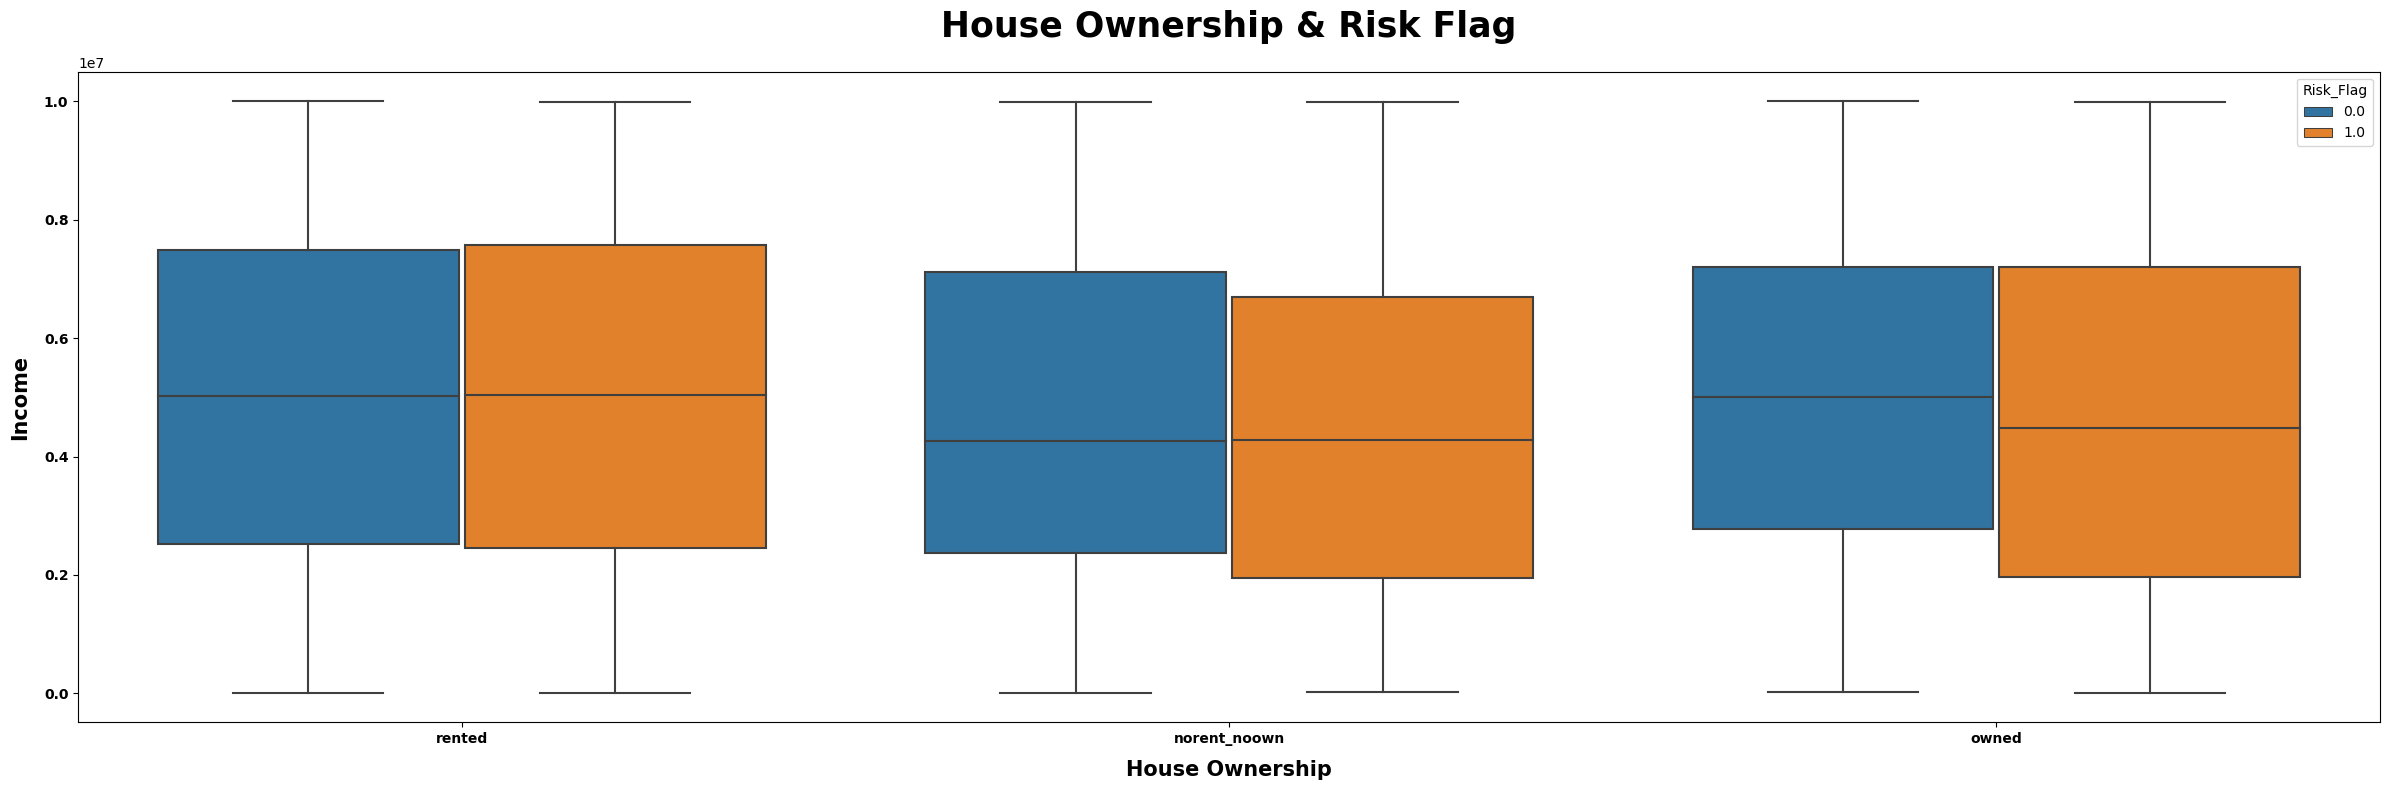

In [104]:
H = (x1.loc[x1["House_Ownership"]
         .isin(["rented", "owned", "norent_noown"])]
         .loc[:, ["Income", "House_Ownership", "Risk_Flag"]])

data = H
title = "House Ownership & Risk Flag"
x = "House_Ownership"
y = "Income"
hue = "Risk_Flag"
xlabel = "House Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

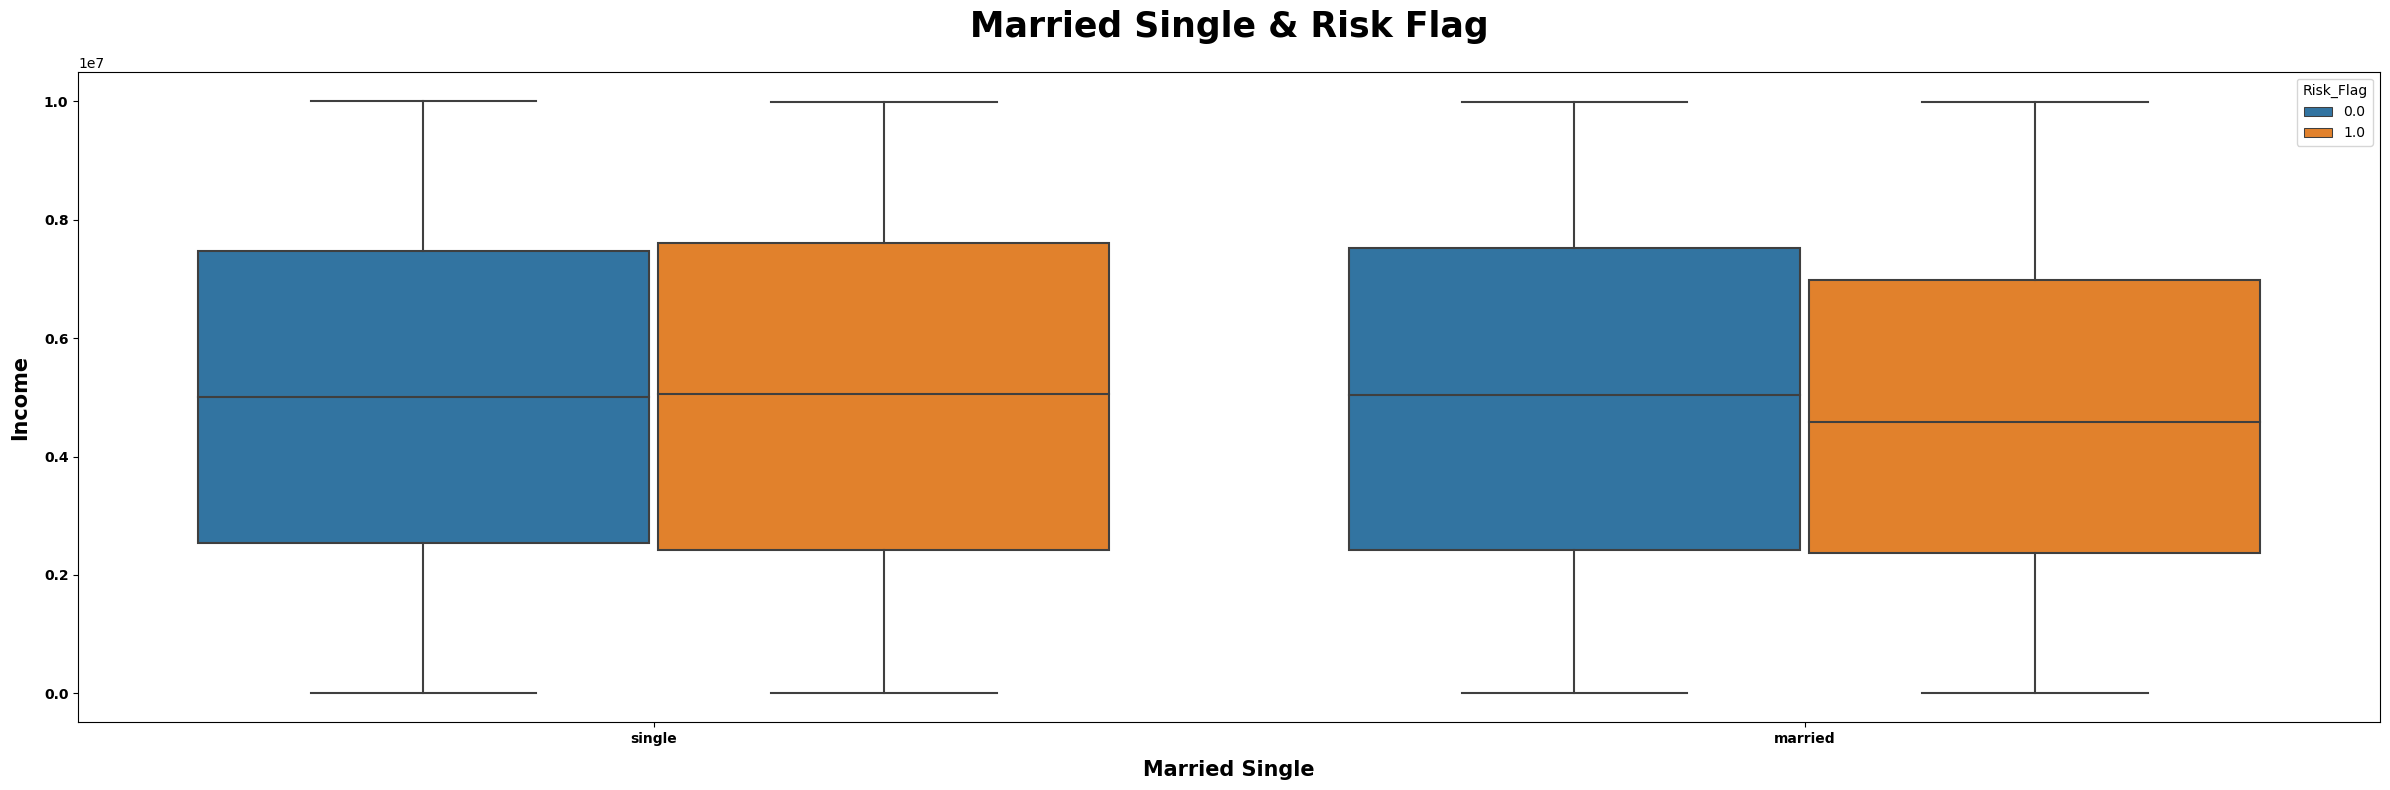

In [105]:
M = (x1.loc[x1["Marital_Status"]
         .isin(["single", "married"])]
         .loc[:, ["Income", "Marital_Status", "Risk_Flag"]])

data = M
title = "Married Single & Risk Flag"
x = "Marital_Status"
y = "Income"
hue = "Risk_Flag"
xlabel = "Married Single"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

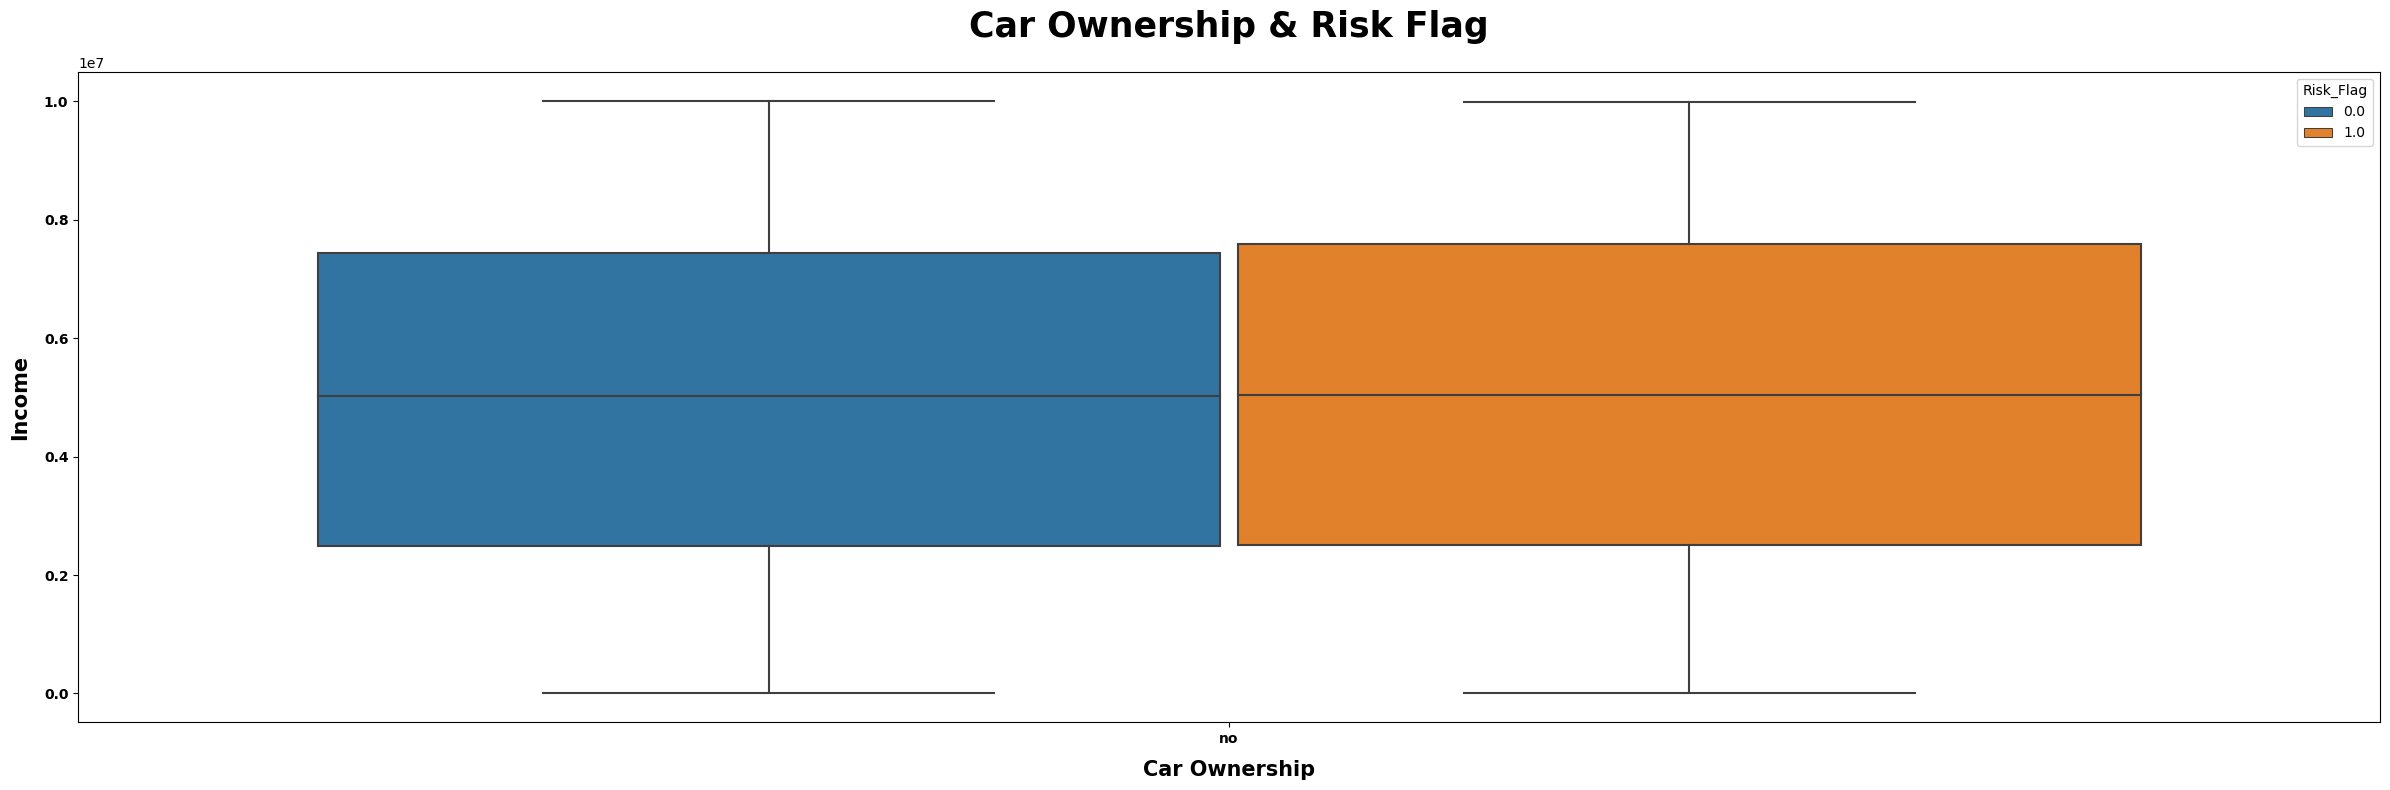

In [36]:
CO = (x1.loc[x1["Car_Ownership"]
          .isin(["no", "single"])]
          .loc[:, ["Income", "Car_Ownership", "Risk_Flag"]])

data = CO
title = "Car Ownership & Risk Flag"
x = "Car_Ownership"
y = "Income"
hue = "Risk_Flag"
xlabel = "Car Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

In [107]:
#5.4.2 | Numerical Column

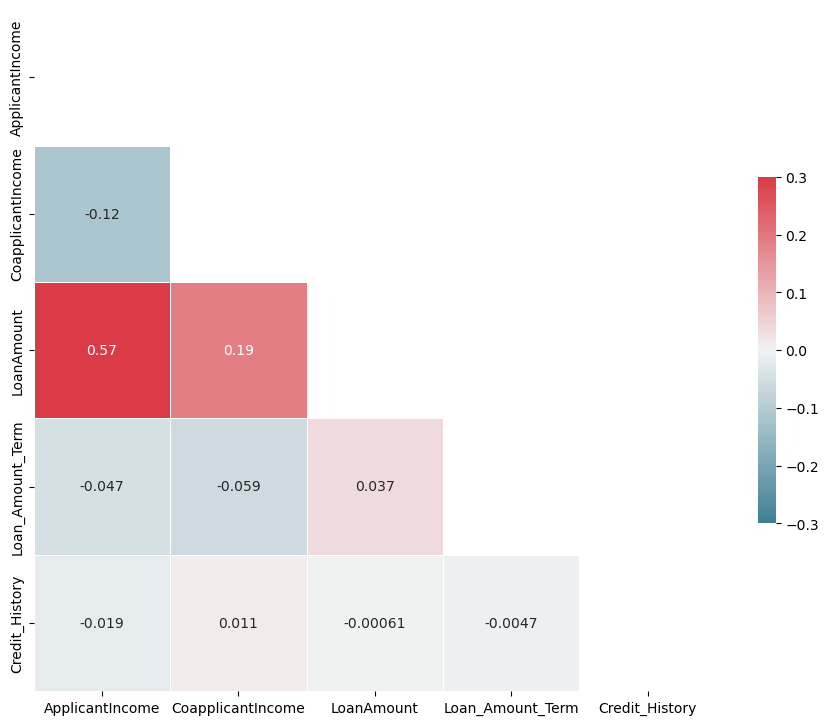

In [44]:
# Create the correlation matrix
corr = x1.corr()

# Generate mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,vmax=.3,vmin=-.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5});

In [45]:
corr.style.background_gradient(cmap=cmap)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [110]:
#6  Data Preprocessing

In [135]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = x1.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    x1[col] = encoder.fit_transform(x1[col].values.tolist())

In [141]:
x1


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Marital_Status,House_Ownership,Car_Ownership,Profession,Rev_State,Rev_CITY
0,1303834.000,23.000,3.000,3.000,13.000,0.000,1,2,1,33,13,252
1,7574516.000,40.000,10.000,9.000,13.000,0.000,1,2,1,43,14,228
2,3991815.000,66.000,4.000,4.000,10.000,0.000,0,2,1,47,12,8
3,6256451.000,41.000,2.000,2.000,12.000,1.000,1,2,2,43,17,54
4,5768871.000,47.000,11.000,3.000,14.000,1.000,1,2,1,11,22,297
...,...,...,...,...,...,...,...,...,...,...,...,...
251999,9070230.000,70.000,17.000,7.000,11.000,0.000,1,2,1,44,22,26
252000,5000694.500,50.000,10.000,6.000,12.000,0.000,0,1,0,5,25,313
252001,5000694.500,50.000,10.000,6.000,5.000,0.000,1,2,1,37,25,313
252002,6507128.000,50.000,10.000,6.000,12.000,0.000,1,2,1,44,25,313


In [137]:
# getting the Mutual Information about the data
X_mutual = x1.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("Risk_Flag")


# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame()

,MI Scores
Income,0.159
House_Ownership,0.044
Marital_Status,0.039
index,0.030
Car_Ownership,0.025
Rev_CITY,0.010
CURRENT_HOUSE_YRS,0.009
CURRENT_JOB_YRS,0.004
Experience,0.004
Rev_State,0.004


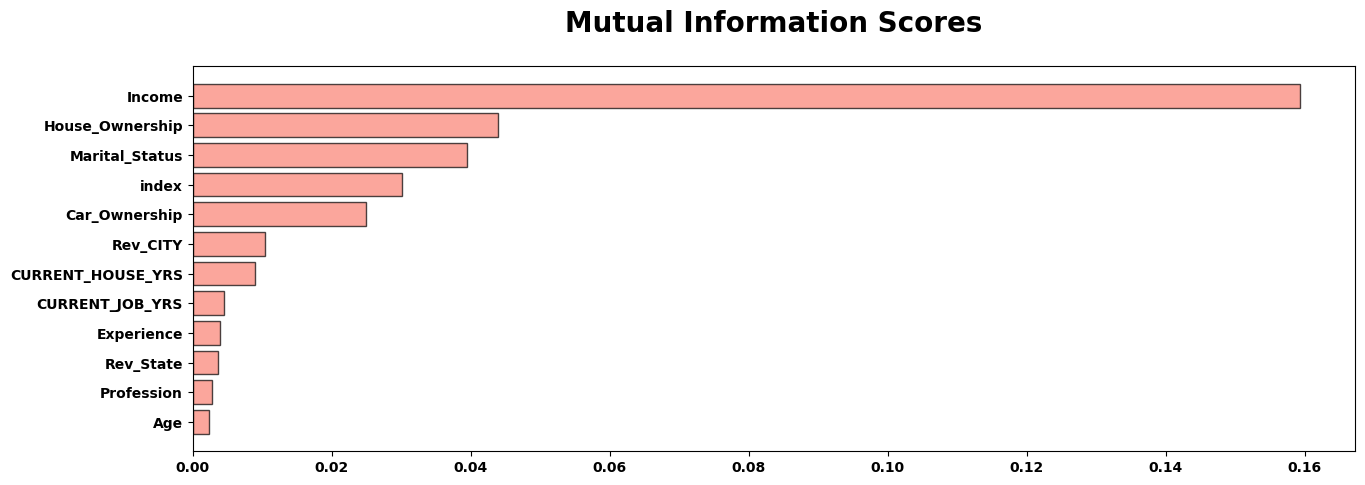

In [138]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

In [35]:
#6.2 Feature Selection

In [140]:
# For now, let's just use income - current_job_yrs column
# I'll update and maybe use feature engineering in the future
features = ["Income", "Rev_CITY", "Experience", 
            "Rev_State", "Profession", "CURRENT_JOB_YRS","House_Ownership","Age","Car_Ownership","Marital_Status","CURRENT_HOUSE_YRS"]

x_features = x1[features]
y_labels = x1["Risk_Flag"]

x_features.shape, y_labels.shape

((252004, 11), (252004,))

In [143]:
x_features.head()

,Income,Rev_CITY,Experience,Rev_State,Profession,CURRENT_JOB_YRS,House_Ownership,Age,Car_Ownership,Marital_Status,CURRENT_HOUSE_YRS
0,1303834.000,252,3.000,13,33,3.000,2,23.000,1,1,13.000
1,7574516.000,228,10.000,14,43,9.000,2,40.000,1,1,13.000
2,3991815.000,8,4.000,12,47,4.000,2,66.000,1,0,10.000
3,6256451.000,54,2.000,17,43,2.000,2,41.000,2,1,12.000
4,5768871.000,297,11.000,22,11,3.000,2,47.000,1,1,14.000


In [144]:
y_labels.value_counts()

0.000    221008
1.000     30996
Name: Risk_Flag, dtype: int64

In [53]:
#6.3 | Split Dataset

In [145]:
#  Splliting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_features, y_labels, test_size=0.3)

print(f"x_train shape: {x_train.shape} \n"
       f"x_test shape: {x_test.shape} \n"
       f"y_train shape: {y_train.shape} \n"
       f"y_test.shape: {y_test.shape}")

x_train shape: (176402, 11) 
x_test shape: (75602, 11) 
y_train shape: (176402,) 
y_test.shape: (75602,)


In [146]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train , y_train)
pred_l = logmodel.predict(x_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

LogisticRegression()

87.66963836935531

In [147]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [148]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train)
pred_rf = random_forest.predict(x_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

RandomForestClassifier()

89.84418401629587

In [56]:
#K-Nearest Neighbors¶
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

KNeighborsClassifier(n_neighbors=3)

88.66167561704717

In [58]:
#Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
pred_gb = gaussian.predict(x_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

GaussianNB()

87.64979762440147

In [ ]:
#SVM
svc = SVC()
svc.fit(x_train, y_train)
pred_svm = svc.predict(x_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

In [ ]:
svm_classifier = SVC()

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [62]:
#Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbc = gbk.predict(x_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

GradientBoostingClassifier()

87.67228380201581

In [63]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forrest,89.955
2,K- Nearest Neighbour,88.662
5,Gradient Boosting Classifier,87.672
0,Logistic Regression,87.650
3,Naive Bayes,87.650
4,SVM,87.650


In [ ]:
#The highest classification accuracy is shown by Random Forrest =>89.955%